![imagen](./img/DGT-2021.png)

## <span style="color:Grey">INFORMACIÓN DEL PROYECTO</span>

### <span style="color:Lightsalmon">TÍTULO</span>

#### **<span style="color:F5F5F5"> Siniestralidad y seguridad vial en vias urbanas a nivel municipal**</span>

### <span style="color:Lightsalmon">TEMA</span>

* La comisión europea anunció en Abril de 2021 los datos de seguridad vial en la Unión Europea, siendo España uno de los países más seguros para viajar por carretera, con 29 fallecidos por millón de habitantes.
Es el cuarto país de la Unión Europea con menor tasa de mortalidad, por detrás de Suecia (18), Malta (21) y Dinamarca (27) y por delante, de países de referencia en seguridad vial como Holanda (31), Alemania (33) y Francia (39).  
Estás variaciones, en parte son consecuencia del COVID-19, que apartó a muchas personas de la carretera durante una temporada y que más tarde experimentó un aumento significativo en usuarios de bicicleta.

* Este análisis se centra en medir, mediante el cruce de datos del INE y la DGT, el impacto que tuvo la pandemia, cómo afectó el corportamiento del conductor después y si afectó al nº de accidentes en España en vías urbanas.

### <span style="color:Lightsalmon">HIPÓTESIS</span>

1. La hipótesis principal es cuantificar la mejora en la seguridad vial y como ha evolucionado desde 2020, un año atípico por la pandemia, y comprobar si en los últimos años se ha mantenido la tendencia o ha mejorado. 

2. Otras hipótesis son, en relación a los datos, ver dónde ocurren más accidentes, qué factores están involucrados y de qué tipo son...

3. Qué colectivo está más afectado...

4. Qué impacto tiene la edad de un vehículo y si existe una fuerte relación con los accidentes/mortalidad...

5. Otros datos que puedan ser de interés que aparecerán a lo largo del análisis.

## <span style="color:Grey">OBTENCIÓN DE LOS DATOS</span>

### <span style="color:Lightsalmon">PREPROCESADO</span>

* Los 3 documentos son parecidos, archivos de excel de 90+ columnas y 8100+ filas. Las primeras 90 son iguales, pero al final cada fichero termina de una manera distinta con columnas de más o de menos.
* "DatosMunicipales2020" tiene 97 columnas de A-CU.
* "DatosMunicipales2021" tiene 95 columnas de A-CQ
* "DatosMunicipales2022" tiene de 99 columnas A-CU

Un inciso antes del susto por tener tantas columnas, entre datos hay columnas vacias (6 en total) y la mayoria de datos son subcategorias, i.e.: 
- Bicicletas Fallecidos, Bicicletas Heridos Graves, Bicicletas Heridos Leves
- Ciclomotores Fallecidos, Ciclomotores Heridos Graves, Ciclomotores Heridos Leves
- Motocicletas...
- Turismos...
- Camiones...


Antes de subirlas en un dataframe trabajo con ellas para igualar el numero de columnas, en el propio excel. 

* Para 2020 añado 2 columnas CM (Casco, Cinturon, SRI 4 pts) y CO (Movil 6pts), para igualar a 2022.
* Y para el año 2021, añado en CU (Total Campañas) además de CM (Casco, Cinturon, SRI 4 pts) y en CO (Movil 6pts)

* Una vez que tengo mis 3 datasets de 99x8196 datos cada uno. Los importo.

* Todos los datos vienen de ``"https://www.dgt.es/menusecundario/dgt-en-cifras/dgt-en-cifras-resultados/?q=Datos%20Municipales&tema=informacion-municipal&pag=1&order=DESC"``

In [1]:
import pandas as pd

# Cargo los dataset desde la carpeta data
df22 = pd.read_excel("./data/DatosMunicipales2022.xlsx")
df21 = pd.read_excel("./data/DatosMunicipales2021.xlsx")
df20 = pd.read_excel("./data/DatosMunicipales2020.xlsx")

In [2]:
# Añado una columna con el año de los datos para cada dataframe
df22["Anho"]=2022
df21["Anho"]=2021
df20["Anho"]=2020

In [3]:
# Se une en un solo df llamado dgt
dgt=pd.concat([df22,df21,df20], axis=0, ignore_index=True)

In [4]:
# Añado una muestra
dgt.sample(50)

,Código INE,Municipio,Provincia,Comunidad Autónoma,Población Total,Población Hombres,Población Mujeres,Unnamed: 7,Conductores Hombres,Conductoras Mujeres,...,Móvil (3 puntos),Móvil (6 puntos),Semáforo (4 puntos),Otra (3 puntos),Otra (4 puntos),Otra (6 puntos),Unnamed: 97,Total Campañas,Anho,Campañas
1436,9328,Rucandio,Burgos,Castilla y León,67.0,32.0,35.0,NaN,24.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN
5073,33054,"Regueras, Las",Asturias,Asturias (Principado de),1888.0,955.0,933.0,NaN,716.0,503.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN
3188,20023,Berrobi,Gipuzkoa,País Vasco,581.0,303.0,278.0,NaN,220.0,150.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN
19507,19306,Torre del Burgo,Guadalajara,Castilla-La Mancha,611.0,341.0,270.0,NaN,51.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,0.0
13663,37082,Cantalpino,Salamanca,Castilla y León,821.0,443.0,378.0,NaN,298.0,134.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,NaN
7822,49186,San Cebrián de Castro,Zamora,Castilla y León,253.0,124.0,129.0,NaN,99.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN
18550,15034,Boqueixón,Coruña (A),Galicia,4206.0,2075.0,2131.0,NaN,1526.0,1274.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,0.0
2625,17158,Sant Climent Sescebes,Girona,Cataluña,696.0,421.0,275.0,NaN,207.0,155.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN
9486,9130,Fresneña,Burgos,Castilla y León,69.0,44.0,25.0,NaN,30.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,NaN
11443,20901,Mendaro,Gipuzkoa,País Vasco,1983.0,1000.0,983.0,NaN,647.0,474.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,NaN


In [5]:
dgt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24588 entries, 0 to 24587
Columns: 101 entries, Código INE to Campañas
dtypes: float64(96), int64(2), object(3)
memory usage: 18.9+ MB


In [6]:
dgt.columns

Index(['Código INE', 'Municipio', 'Provincia', 'Comunidad Autónoma',
       'Población Total', 'Población Hombres', 'Población Mujeres',
       'Unnamed: 7', 'Conductores Hombres', 'Conductoras Mujeres',
       ...
       'Móvil (3 puntos)', 'Móvil (6 puntos)', 'Semáforo (4 puntos)',
       'Otra (3 puntos)', 'Otra (4 puntos)', 'Otra (6 puntos)', 'Unnamed: 97',
       'Total Campañas', 'Anho', 'Campañas'],
      dtype='object', length=101)

In [7]:
# Eliminamos columnas vacias(Unnamed) y la que se llama Campañas,
# porque se creó a mayores por no tener el titulo igual al resto
dgt.drop(columns=["Unnamed: 7","Unnamed: 11","Unnamed: 41","Unnamed: 48","Unnamed: 80","Unnamed: 97","Campañas"], axis=1, inplace=True)

In [8]:
dgt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24588 entries, 0 to 24587
Data columns (total 94 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Código INE                              24588 non-null  int64  
 1   Municipio                               24588 non-null  object 
 2   Provincia                               24588 non-null  object 
 3   Comunidad Autónoma                      24588 non-null  object 
 4   Población Total                         24393 non-null  float64
 5   Población Hombres                       24393 non-null  float64
 6   Población Mujeres                       24393 non-null  float64
 7   Conductores Hombres                     24496 non-null  float64
 8   Conductoras Mujeres                     24496 non-null  float64
 9   Censo Conductores                       24496 non-null  float64
 10  Parque Ciclomotores                     24516 non-null  fl

In [9]:
# Se guarda en un archivo excel, solo la primera vez, para tenerlo como salvaguarda
#dgt.to_excel('./data/dgt_202122.xlsx', index=False)

### <span style="color:Lightsalmon">COLUMNAS</span>

Las columnas (94), una vez que eliminamos las columnas vacías del dataframe, son:

|nCol|Columna|Informacion|
|-|-|-|
|0|Codigo INE|Correspondientes a cada municipio, se componen de cinco dígitos: los dos primeros corresponden al código de la provincia y los tres restantes al del municipio dentro de ésta|
|1|Municipio| Municipio|
|2|Provincia|Provincia|
|3|Comunidad Autonoma|COmnidad Autonoma|
|4|Poblacion Total|Suma de la poblacion Hombres y Poblacion Mujeres|
|5|Poblacion Hombres|nº de Hombres en ese municipio|
|6|Poblacion Mujeres|nº de Mujeres en ese municipio|
|7|Conductores Hombres|nº de conductores hombres|
|8|Conductoras Mujeres|nº de conductoras mujeres|
|9|Censo Conductores|nº total de conductores|
|10-14|Parque Vehículos|nº de vehículos registrados(Se excluyen los que están en situación de baja)|
|15|Parque Total|nº de vehiculos en resgistrados totales|
|16-18|Vehículos sin ITV(<25años)|Motocicletas,Turismos y Resto de vehiculos sin itv <25 años|
|19-38|Parque de vehículos|Antigüedad del parque de vehiculos, en grupos de <25, <15, <8, <4|
|39-44|Antiguëdad media|Promedio de la antigüedad del parque con < 25 años para cada clase de vehículos.|
|45-75|Siniestralidad vial en vías urbanas|Heridos Graves, Leves o Fallecidos en según que vehículo por accidente|
|76|Total Sanciones con Puntos|Número de sanciones con detracción de puntos|
|77|Total Puntos Detraidos|Nº de puntos retirados por las infracciones|
|78-91|Sanciones(Puntos)|nº de infracciones para cada sanción|
|92|Total campañas|Nº de Campañas de tráfico para controlar la seguridad vial|
|93|Anho|Año en el que se obtuvieron los datos|

### <span style="color:Lightsalmon">LIMPIEZA</span>

In [10]:
# Para limpiar mis datos voy a fijarme cuales son NaN y como los puedo rellenar
dgt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24588 entries, 0 to 24587
Data columns (total 94 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Código INE                              24588 non-null  int64  
 1   Municipio                               24588 non-null  object 
 2   Provincia                               24588 non-null  object 
 3   Comunidad Autónoma                      24588 non-null  object 
 4   Población Total                         24393 non-null  float64
 5   Población Hombres                       24393 non-null  float64
 6   Población Mujeres                       24393 non-null  float64
 7   Conductores Hombres                     24496 non-null  float64
 8   Conductoras Mujeres                     24496 non-null  float64
 9   Censo Conductores                       24496 non-null  float64
 10  Parque Ciclomotores                     24516 non-null  fl

* (A) Lo primero que veo es que hay municipios sin especificar, que no contienen datos de poblacion, pero si pueden contener valores en el resto.
* (B) Hay algunos municipios que no incluyen datos de antigüedad de algún transporte.
* (C) Existen municipios donde no hay recogidos valores para los heridos leves, graves o fallecidos de ningun tipo.
* (D) La mayoría de los municipios no tienen datos en las columnas de sanciones por tipo.


* Para los casos A y C voy a rellenar esos valores con 0, ya que suponemos que la falta de valores coincide con que hay 0 casos.
* Para el caso B voy a rellenar con la media de cada vehículo.
* En el caso (D), estas columnas tienen muy pocos valores, me dan poca informacion. Me las voy a guardar en otro dataframe con el codigo ine y el año, para no trabajar con ellos directamente, pero los quiero dejar apartados por si luego me interesan, pero de primeras las elimino.

In [11]:
# Hago una copia del dataframe para las columnas desde la 76 a la 92
columnas_puntos=[dgt.columns[0]]+list(dgt.columns[76:93])+[dgt.columns[-1]]
dgt_puntos=dgt[columnas_puntos].copy()

In [12]:
# Elimino las columnas del dataframe principal: dgt
dgt.drop(dgt.columns[76:93], axis=1, inplace=True)

In [14]:
# Busco las columnas que son variables continuas para poner 
# sus valores NaN como la media de cada una.
col_anti=dgt.columns[dgt.columns.str.contains('Antigüedad')]
for col in col_anti:
    dgt[col].fillna(dgt[col].mean(), inplace=True)

In [15]:
# Ahora relleno el resto de los valores NaN con 0
dgt.fillna(0, inplace=True)

#### CARDINALIDAD DE LAS VARIABLES

In [16]:
# El código INE es en realidad una variable categórica, ya que cada valor pertenece a un municipio, le cambiamos el tipo a objetc
dgt["Código INE"] = dgt["Código INE"].astype(object)
dgt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24588 entries, 0 to 24587
Data columns (total 77 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Código INE                              24588 non-null  object 
 1   Municipio                               24588 non-null  object 
 2   Provincia                               24588 non-null  object 
 3   Comunidad Autónoma                      24588 non-null  object 
 4   Población Total                         24588 non-null  float64
 5   Población Hombres                       24588 non-null  float64
 6   Población Mujeres                       24588 non-null  float64
 7   Conductores Hombres                     24588 non-null  float64
 8   Conductoras Mujeres                     24588 non-null  float64
 9   Censo Conductores                       24588 non-null  float64
 10  Parque Ciclomotores                     24588 non-null  fl

In [70]:
# Antes de empezar cambio los tipos. Solo tienen decimales, por tanto float64, 
# los que miden la antigüedad.
for col in dgt.columns:
    if col in ["Código INE", "Municipio", "Provincia", "Comunidad Autónoma"]:
        continue
    elif "Antigüedad" in col:
        continue
    else:
        dgt[col] = dgt[col].astype('int64')

In [71]:
# Calculo de cardinalidad
df_cardinalidad = pd.DataFrame([dgt.nunique(), dgt.nunique()/len(dgt) * 100, dgt.dtypes]).T.rename(columns = {0: "Card", 1: "%_Card", 2: "Tipo"})
df_cardinalidad

,Card,%_Card,Tipo
Código INE,8196,33.333333,object
Municipio,8179,33.264194,object
Provincia,52,0.211485,object
Comunidad Autónoma,19,0.077273,object
Población Total,7252,29.494062,int64
...,...,...,...
Nº Accidentes con Víctimas,290,1.179437,int64
Fallecidos,21,0.085408,int64
Heridos Hospitalizados,75,0.305027,int64
Heridos no Hospitalizados,301,1.224174,int64


#### CLASIFICACION VARIABLES

In [83]:
# Clasificacion de variables
df_cardinalidad["Clasificada_como"] = "Numérica Discreta"
df_cardinalidad.loc[df_cardinalidad["Tipo"] == "object", "Clasificada_como"] = "Categórica"
df_cardinalidad.loc[(df_cardinalidad["%_Card"] > 30) & (df_cardinalidad["Tipo"] == "float64"), "Clasificada_como"] = "Numérica Continua"
df_cardinalidad.loc["Anho", "Clasificada_como"]="Categórica"
df_cardinalidad.Clasificada_como.value_counts()


Clasificada_como
Numérica Discreta    66
Numérica Continua     6
Categórica            5
Name: count, dtype: int64

In [84]:
df_cardinalidad

,Card,%_Card,Tipo,Clasificada_como
Código INE,8196,33.333333,object,Categórica
Municipio,8179,33.264194,object,Categórica
Provincia,52,0.211485,object,Categórica
Comunidad Autónoma,19,0.077273,object,Categórica
Población Total,7252,29.494062,int64,Numérica Discreta
...,...,...,...,...
Nº Accidentes con Víctimas,290,1.179437,int64,Numérica Discreta
Fallecidos,21,0.085408,int64,Numérica Discreta
Heridos Hospitalizados,75,0.305027,int64,Numérica Discreta
Heridos no Hospitalizados,301,1.224174,int64,Numérica Discreta


Termino de completar mi cuadro de variables

|nCol|Columna|Informacion|Tipo Variable| Importancia|Notas|
|-|-|-|-|-|-|
|0|Codigo INE|Correspondientes a cada municipio, se componen de cinco dígitos: los dos primeros corresponden al código de la provincia y los tres restantes al del municipio dentro de ésta|Categórica|1||
|1|Municipio| Municipio|Categorica|1|Mas relevante que provincia|
|2|Provincia|Provincia|Categorica|2|
|3|Comunidad Autonoma|Comunidad Autonoma|Categorica|2|Pruebas demograficas|
|4|Poblacion Total|Suma de la poblacion Hombres y Poblacion Mujeres|Numerica Discreta|1|Pruebas demograficas|
|5|Poblacion Hombres|nº de Hombres en ese municipio|Numerica Discreta|2|Pruebas demograficas|
|6|Poblacion Mujeres|nº de Mujeres en ese municipio|Numerica Discreta|2|Pruebas demograficas|
|7|Conductores Hombres|nº de conductores hombres|Numerica Discreta|2|Pruebas demograficas|
|8|Conductoras Mujeres|nº de conductoras mujeres|Numerica Discreta|2|Pruebas demograficas|
|9|Censo Conductores|nº total de conductores|Numerica Discreta|2|Pruebas demograficas|
|10-14|Parque Vehículos|nº de vehículos registrados(Se excluyen los que están en situación de baja)|Numerica Discreta|2|Nos puede servir para encontrar informacion util|
|15|Parque Total|nº de vehiculos en resgistrados totales|Numerica Discreta|2||
|16-18|Vehículos sin ITV(<25años)|Motocicletas,Turismos y Resto de vehiculos sin itv <25 años|Numerica Discreta|2||
|19-38|Parque de vehículos|Antigüedad del parque de vehiculos, en grupos de <25, <15, <8, <4|Numérica discreta|2|Variables de referencia para explicar los accidentes|
|39-44|Antiguëdad media|Promedio de la antigüedad del parque con < 25 años para cada clase de vehículos.|Numérica continua|1|Variables de referencia para explicar los accidentes|
|45-75|Siniestralidad vial en vías urbanas|Heridos Graves, Leves o Fallecidos en según que vehículo por accidente|Numérica discreta|0|mis variables mas importantes están aqui| 
|76|Anho|Año en el que se obtuvieron los datos|Categórica|1|La vamos a utilizar para comparar por años|

## <span style="color:Grey">ANÁLISIS EXPLORATORIO DE DATOS (EDA)</span>

### <span style="color:Lightsalmon">ANALISIS UNIVARIANTE</span>

In [21]:
# Utilizo el fichero donde tengo las funciones de las gráficas
from utils.Graficos import barras_frecuencias, histo_box, outliers,\
    grupal_num_disc, fallecidos

#### CATEGÓRICAS
Empiezo por el análisis de las variables categóricas (Anho, Municipio, Provincia, Comunidad Autónoma)

In [22]:
# Anho
dgt.Anho.value_counts()

Anho
2022    8196
2021    8196
2020    8196
Name: count, dtype: int64

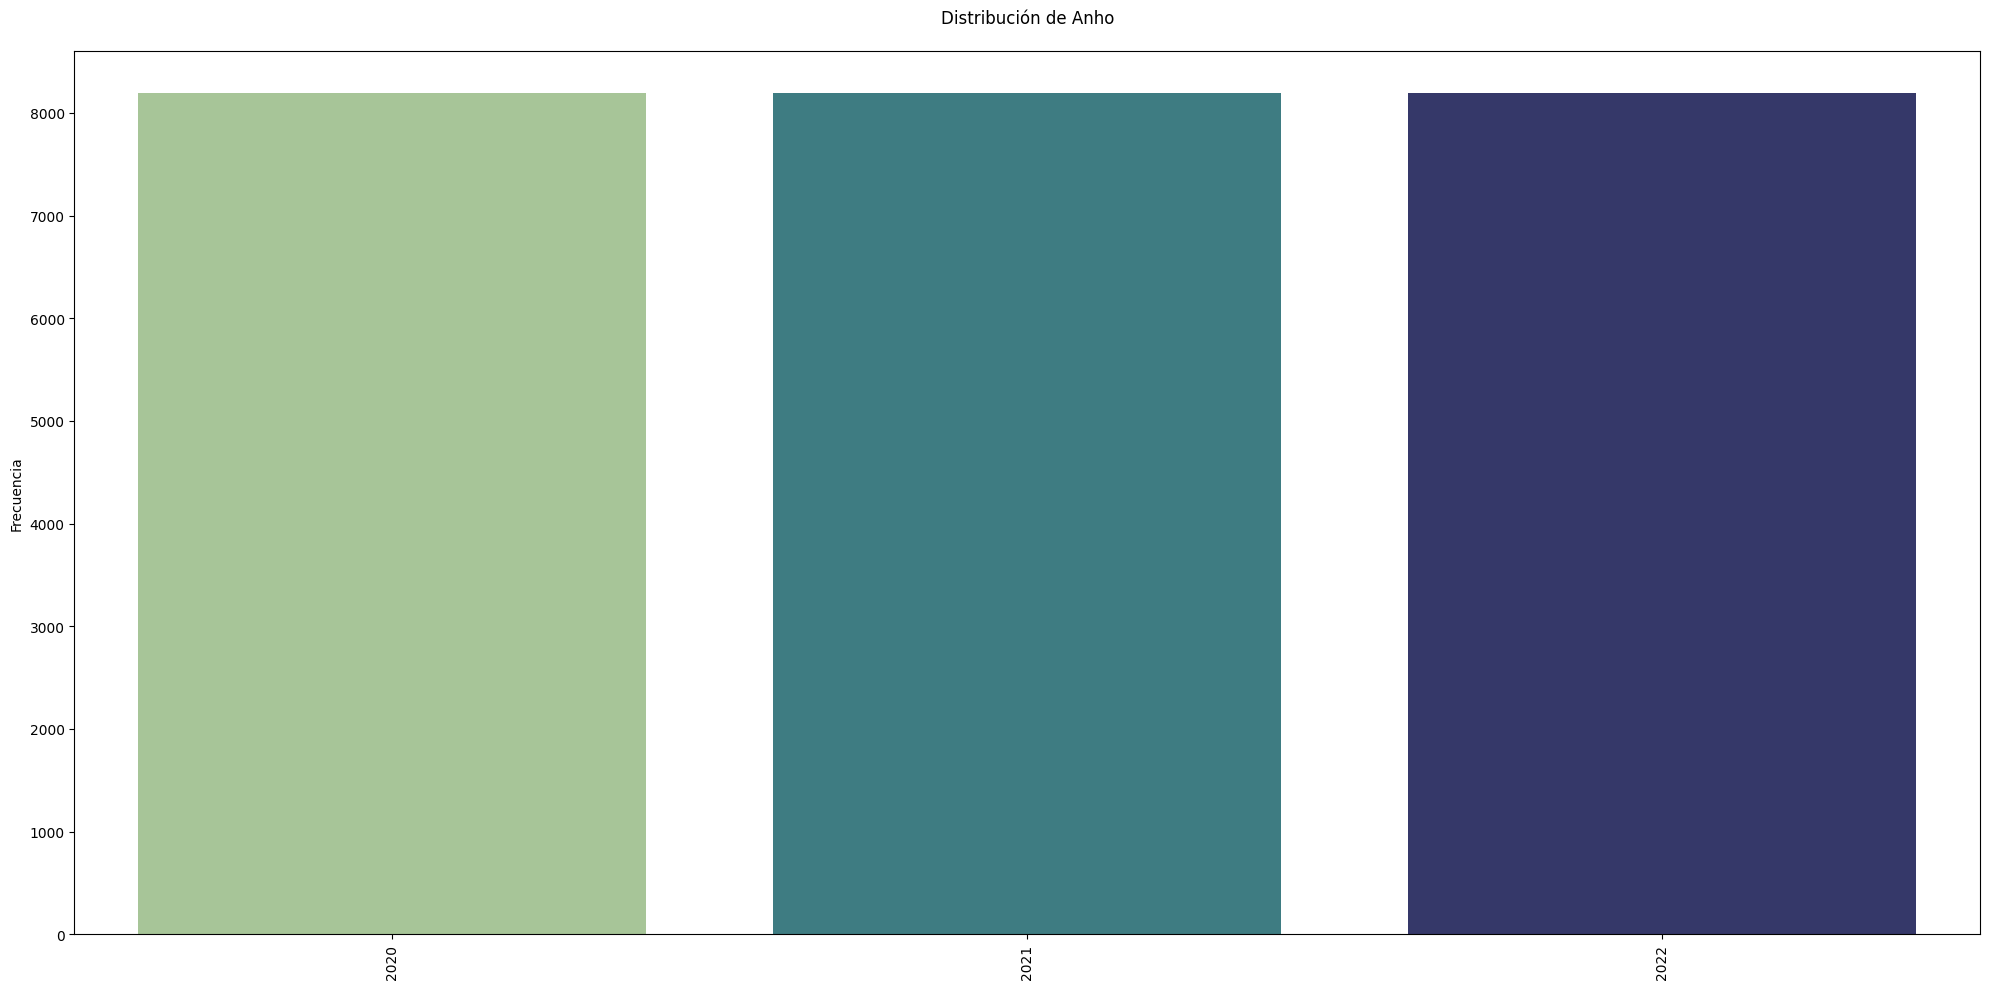

In [23]:
barras_frecuencias(dgt,"Anho")

In [24]:
# Municipio
dgt.Municipio

0        Alava ( municipio sin especificar)
1                          Alegría-Dulantzi
2                                   Amurrio
3                                   Aramaio
4                                Artziniega
                        ...                
24583                                  Biel
24584                              Marracos
24585                 Villamayor de Gállego
24586                                 Ceuta
24587                               Melilla
Name: Municipio, Length: 24588, dtype: object

In [25]:
dgt[dgt['Anho'] == 2022].groupby('Municipio')['Municipio'].apply(lambda x: x[x.str.contains('sin especificar', case=False)]).value_counts()

Municipio
Alava ( municipio sin especificar)                     1
Santa Cruz de Tenerife ( municipio sin especificar)    1
Madrid ( municipio sin especificar)                    1
Malaga ( municipio sin especificar)                    1
Murcia ( municipio sin especificar)                    1
                                                      ..
Guadalajara ( municipio sin especificar)               1
Guipuzcoa ( municipio sin especificar)                 1
Huelva ( municipio sin especificar)                    1
Huesca ( municipio sin especificar)                    1
Zaragoza ( municipio sin especificar)                  1
Name: count, Length: 63, dtype: int64

In [26]:
dgt.Municipio.value_counts().value_counts()

count
3    8162
6      17
Name: count, dtype: int64

In [27]:
dgt.Municipio.value_counts().nlargest(20)

Municipio
Torrent                       6
Sobrado                       6
Moya                          6
Sancti-Spíritus               6
Sada                          6
Arroyomolinos                 6
Rebollar                      6
Zarza, La                     6
Castejón                      6
Mieres                        6
Campillo, El                  6
Villaescusa                   6
Cieza                         6
Fonfría                       6
Villanueva de los Infantes    6
Cabanes                       6
Molar, El                     6
Campillo de Azaba             3
Canillas de Abajo             3
Candelario                    3
Name: count, dtype: int64

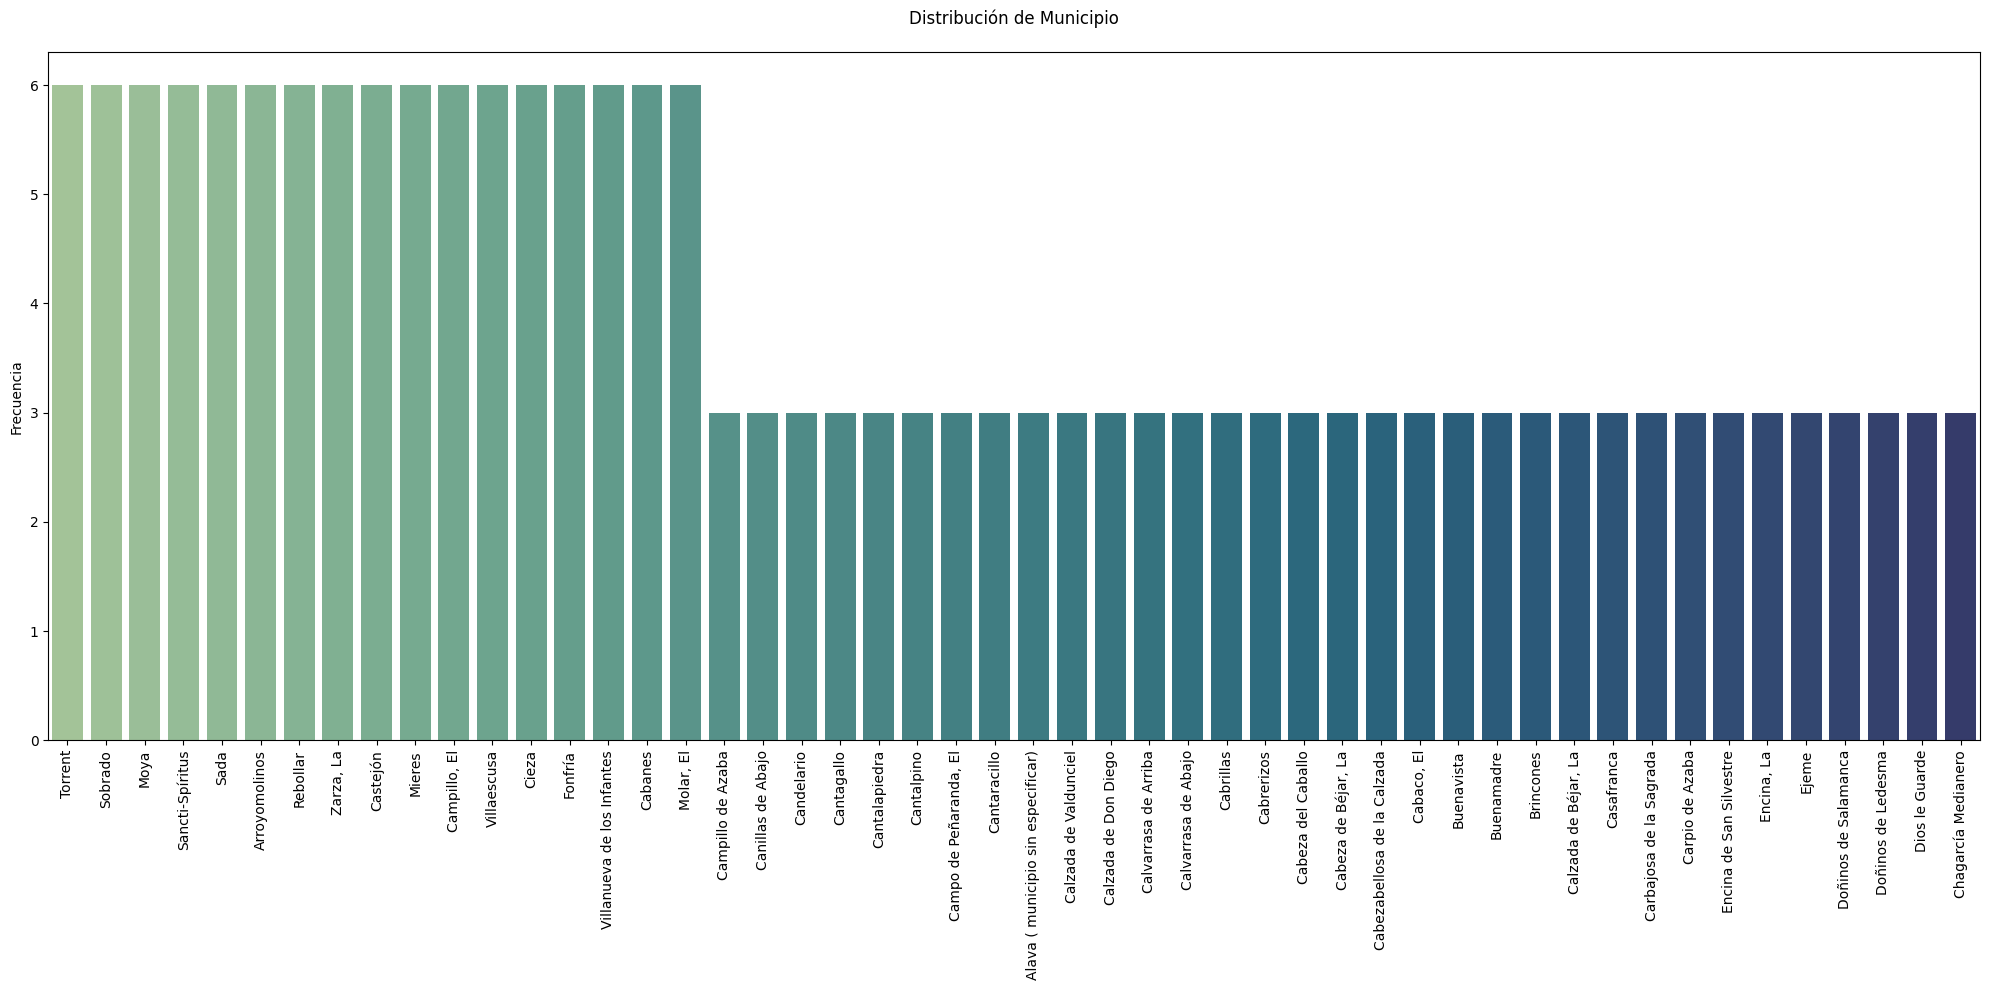

In [28]:
barras_frecuencias(dgt,"Municipio",tamaño=50)

In [29]:
# Provincia
dgt.Provincia.value_counts()

Provincia
Burgos                    1116
Salamanca                 1089
Barcelona                  936
Zaragoza                   882
Guadalajara                867
Navarra                    819
Valencia/València          801
Ávila                      747
Zamora                     747
Cuenca                     717
Teruel                     711
Lleida                     696
Valladolid                 678
Cáceres                    672
Girona                     666
León                       636
Segovia                    630
Toledo                     615
Huesca                     609
Palencia                   576
Tarragona                  555
Soria                      552
Madrid                     540
Rioja (La)                 525
Granada                    525
Badajoz                    498
Alicante/Alacant           426
Castellón/Castelló         408
Bizkaia                    339
Sevilla                    321
Almería                    312
Málaga                     31

In [30]:
resultados_provincia = dgt['Provincia'].value_counts()

# Verificar si todos los valores son divisibles por 3
all(valor % 3 == 0 for valor in resultados_provincia)

True

In [31]:
dgt.Provincia.value_counts().describe()

count      52.000000
mean      472.846154
std       273.849779
min         3.000000
25%       258.750000
50%       462.000000
75%       673.500000
max      1116.000000
Name: count, dtype: float64

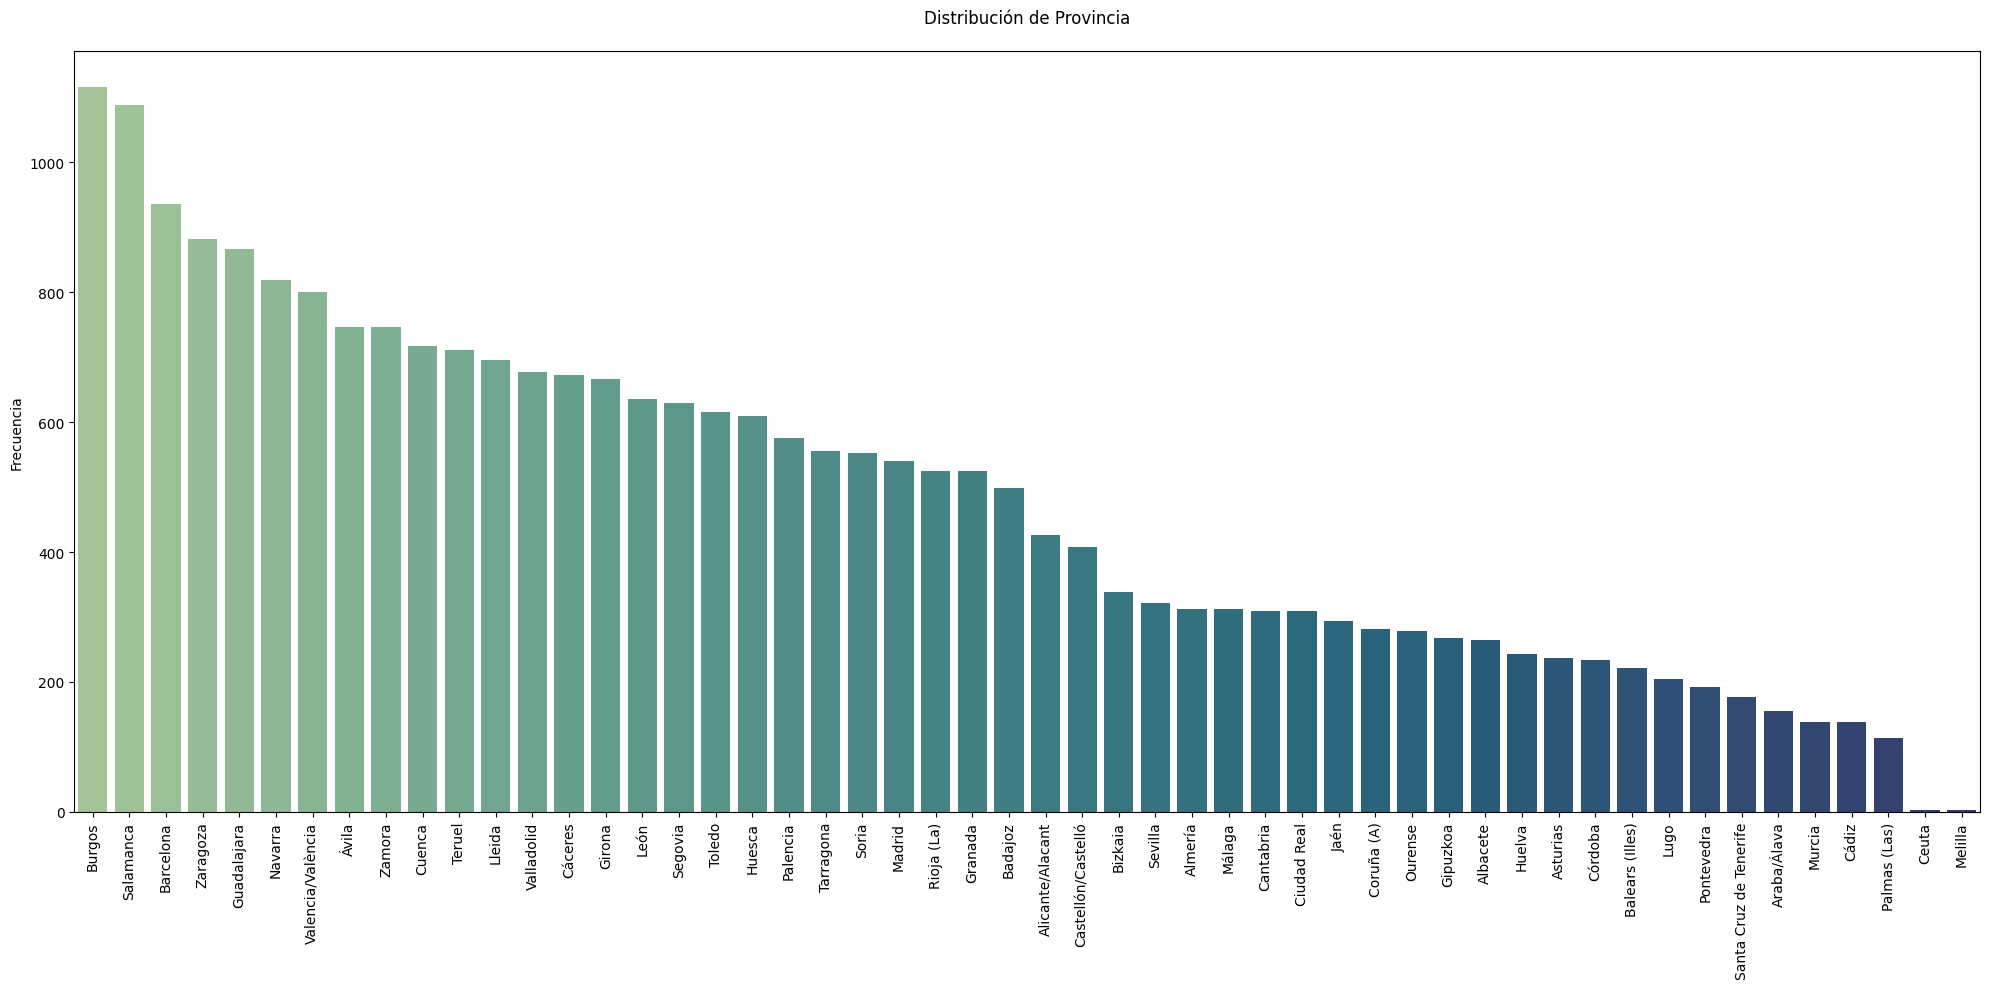

In [32]:
barras_frecuencias(dgt,"Provincia")

In [33]:
# Comunidad Autónoma
dgt["Comunidad Autónoma"].value_counts()

Comunidad Autónoma
Castilla y León                 6771
Cataluña                        2853
Castilla-La Mancha              2772
Andalucía                       2379
Aragón                          2202
Comunitat Valenciana            1635
Extremadura                     1170
Galicia                          957
Navarra (Comunidad Foral de)     819
País Vasco                       762
Madrid (Comunidad de)            540
Rioja (La)                       525
Cantabria                        309
Canarias                         291
Asturias (Principado de)         237
Balears (Illes)                  222
Murcia (Región de)               138
Ceuta                              3
Melilla                            3
Name: count, dtype: int64

In [34]:
dgt["Comunidad Autónoma"].describe()

count               24588
unique                 19
top       Castilla y León
freq                 6771
Name: Comunidad Autónoma, dtype: object

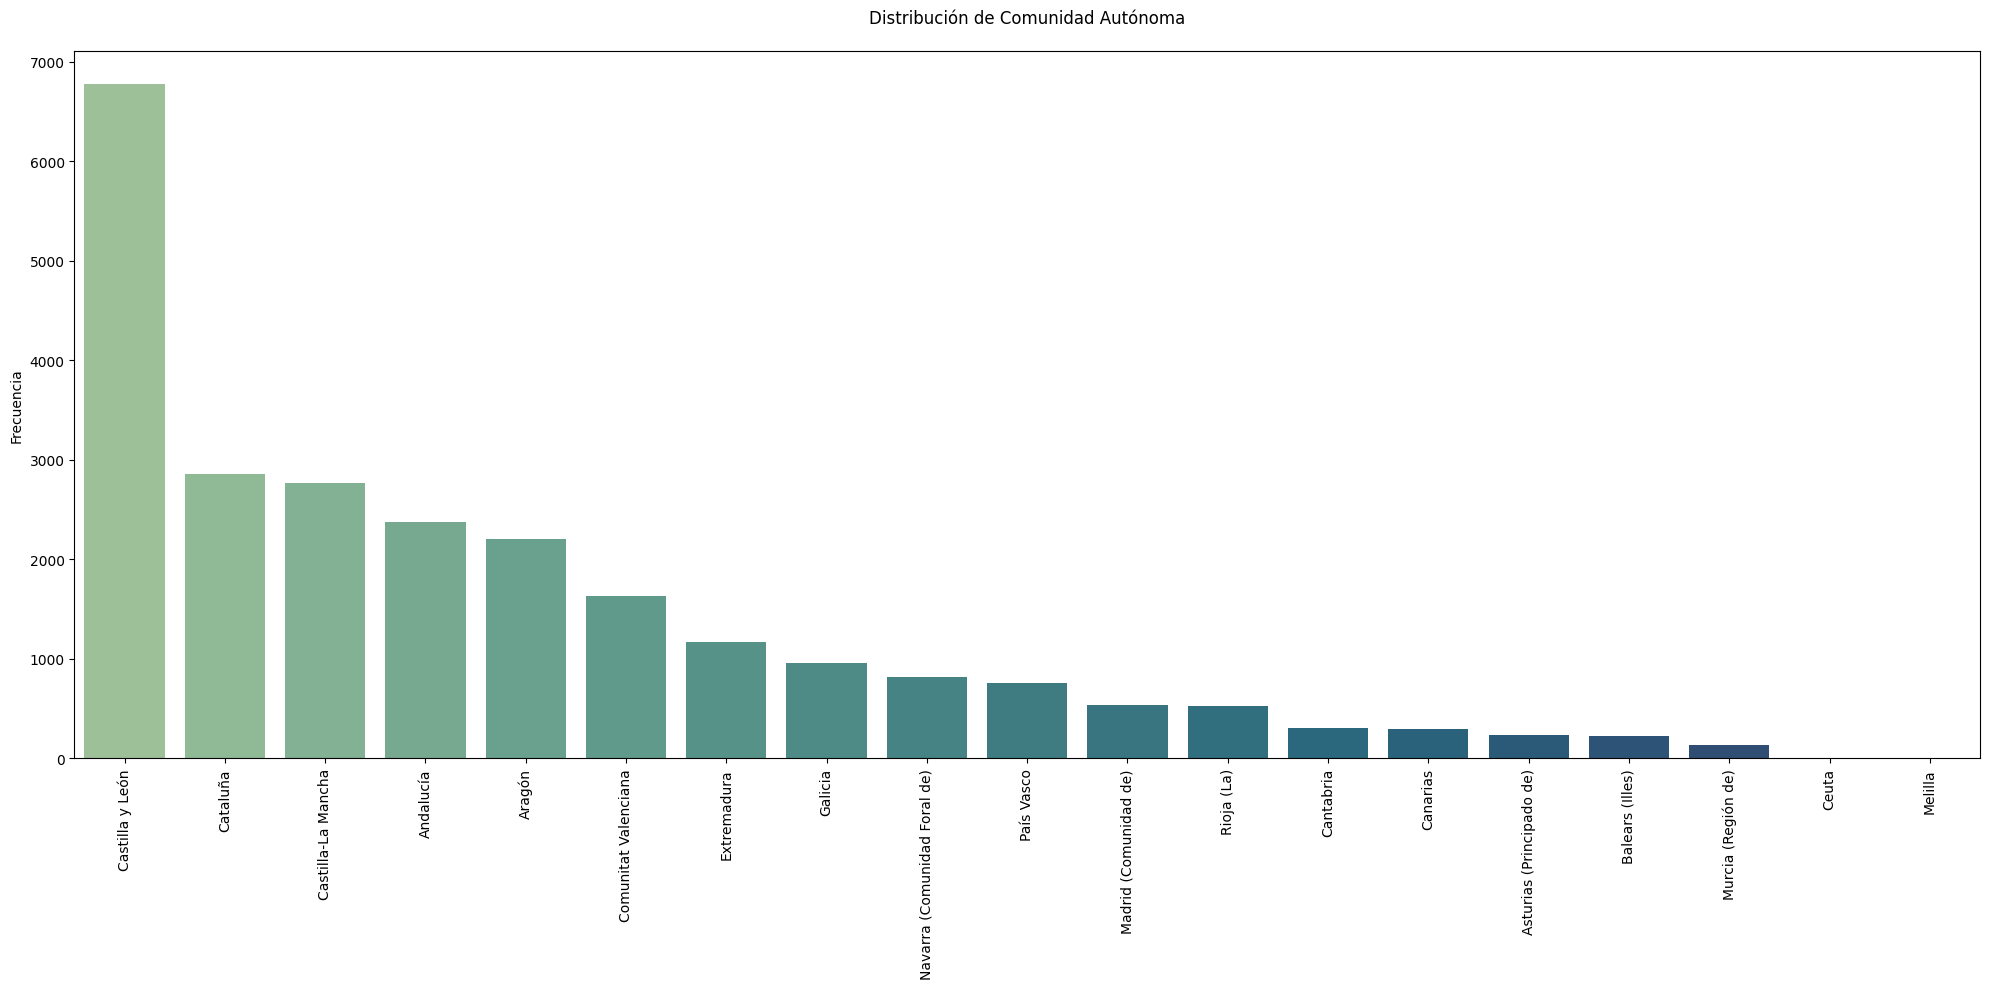

In [86]:
barras_frecuencias(dgt,"Comunidad Autónoma")

RESUMEN CATEGORICAS

**Anho**: Se puede observar que para todos los años, los 3, tienen la misma cantidad de filas, 8196. Más adelante se usará para ver como ha evolucionado, las variables que comparemos con el tiempo. No es necesario ver la distribución relativa.

**Municipio**: Lo primero que podemos ver es que entre los municipios, aparecen valores sin espeficicar, que coinciden con las provincias más las islas, 63 filas por año. Tambien observamos que la media de filas por municipio es de 3, lo que tiene sentido ya que hay 3 años incluidos. Algunos municipios, se repiten en nombre por eso duplican sus filas. Son 17 municipios: 

``Torrent, Sobrado, Moya, Sancti-Spíritus, Sada, Arroyomolinos, Rebollar, La Zarza, Castejón, Mieres, El Campillo, Villaescusa, Cieza, Fonfría, Villanueva de los Infantes, Cabanes, El Molar``

**Provincia**: En las provincias nos aparecen las 50 provincias más 2 ciudades que son Ceuta y Melilla. Éstas, tienen solo 3 filas de datos siendo las que menos tienen, mientras que por su parte Burgos, es la que más municipios alberga con 1116. La media es de 472 municipios. Además se comprueba que todas los valores de cada provincia, es multiplo de 3, para confirmar que todos los dato son consistentes.

**Comunidad Autónoma**: Aquí observamos que aparecen 17 comunidades (incluidas Canarias y Baleares) más las 2 ciudades autónomas de Ceuta y Melilla. Se observa una gran diferencia entre Castilla y León y el resto de comunidades. Comprobaremos más adelante si la población es proporcional al número de municipios, aunque suponemos que no.

#### NUMÉRICAS CONTINUAS

En esta sección analizaré la antigüedad media del parque, de ciclomotores, de motocicletas, de turismos, furgonetas y camiones. En total 6 variables numéricas continuas.

In [36]:
# Antigüedad Media del Parque (<25 años)
dgt["Antigüedad Media del Parque (<25 años)"].describe().round(2)

count    24588.00
mean        13.79
std          1.55
min          1.95
25%         12.90
50%         13.93
75%         14.78
max         24.59
Name: Antigüedad Media del Parque (<25 años), dtype: float64

In [37]:
# Calculo los bigotes con un k=1.5
outliers(dgt,"Antigüedad Media del Parque (<25 años)")

Lim. Superior: 17.6, Lim. Inferior: 10.08.
Numero de datos por encima: 105, numero de datos por debajo: 264.
Numero de datos fuera de límites: 369


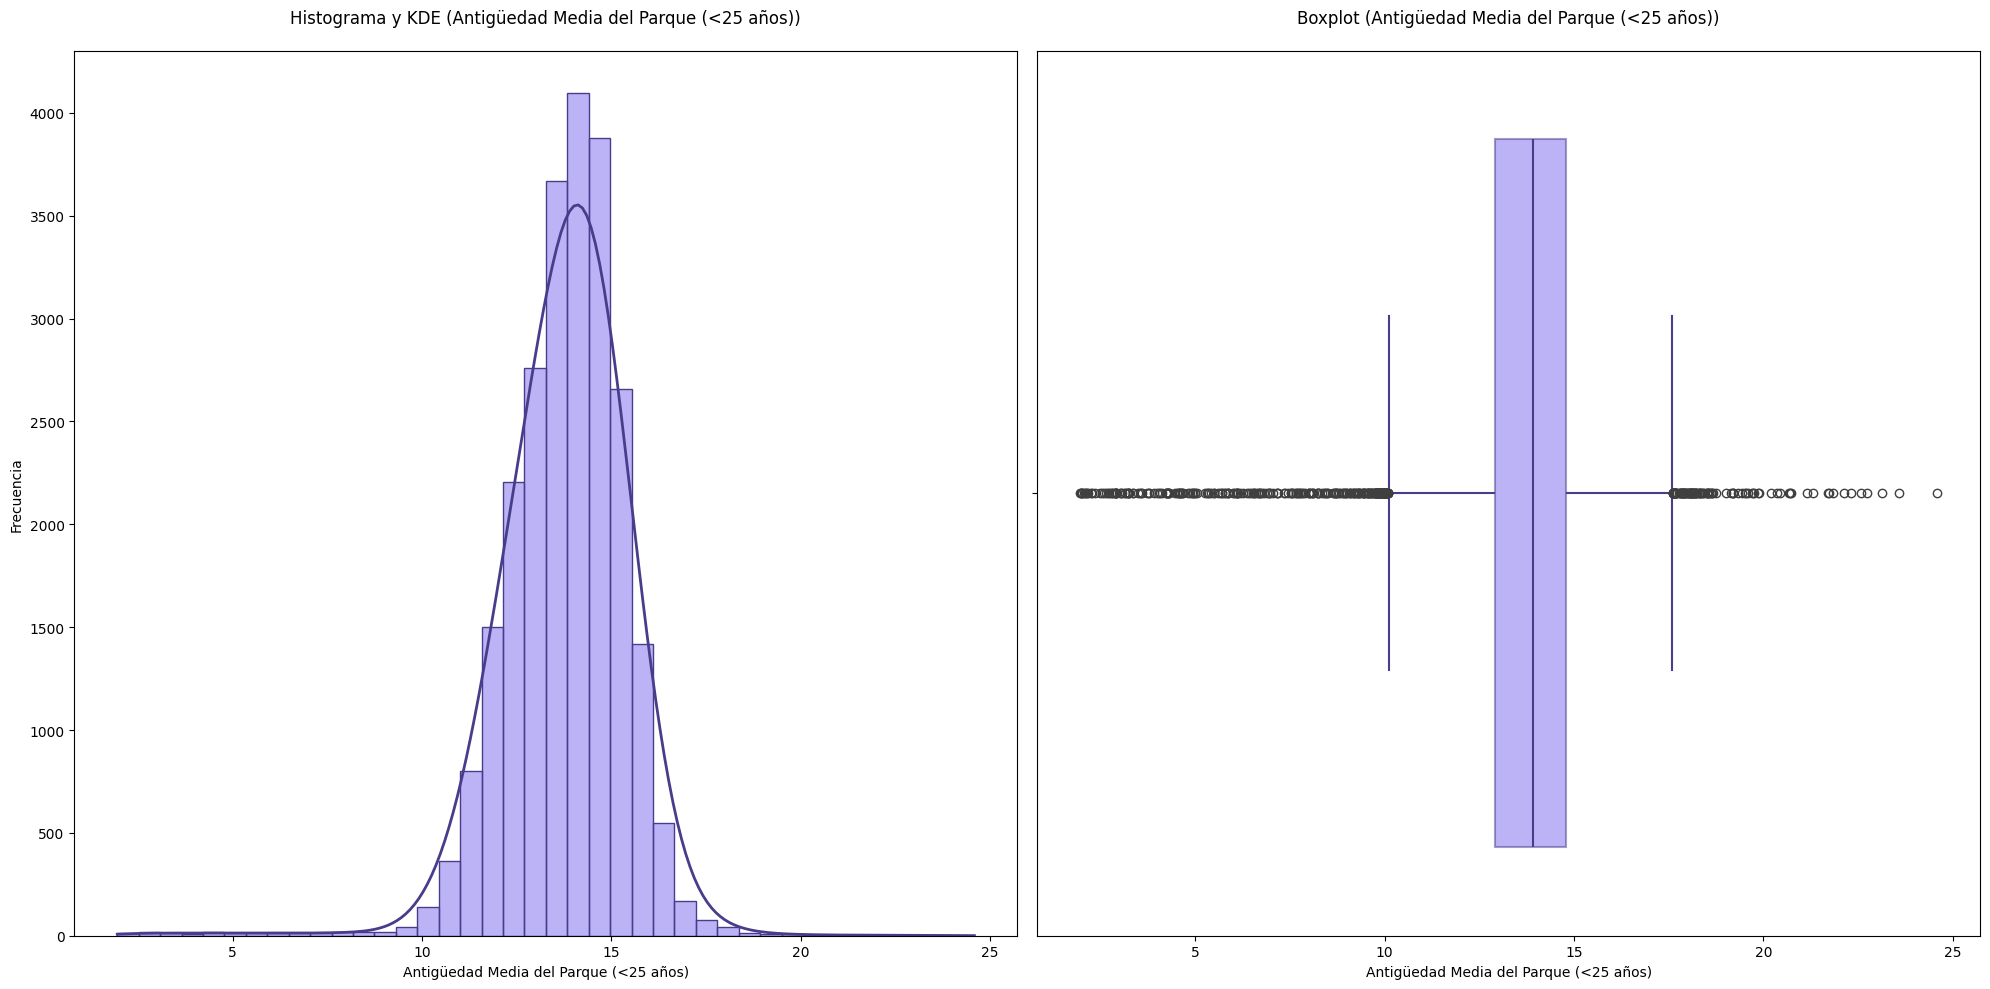

In [38]:
histo_box(dgt,"Antigüedad Media del Parque (<25 años)")

In [39]:
# Antigüedad Media de Ciclomotores
dgt["Antigüedad Media de Ciclomotores"].describe().round(2)

count    24588.00
mean        18.61
std          1.90
min          0.18
25%         17.67
50%         18.61
75%         19.73
max         24.48
Name: Antigüedad Media de Ciclomotores, dtype: float64

In [40]:
outliers(dgt,"Antigüedad Media de Ciclomotores")

Lim. Superior: 22.82, Lim. Inferior: 14.58.
Numero de datos por encima: 198, numero de datos por debajo: 619.
Numero de datos fuera de límites: 817


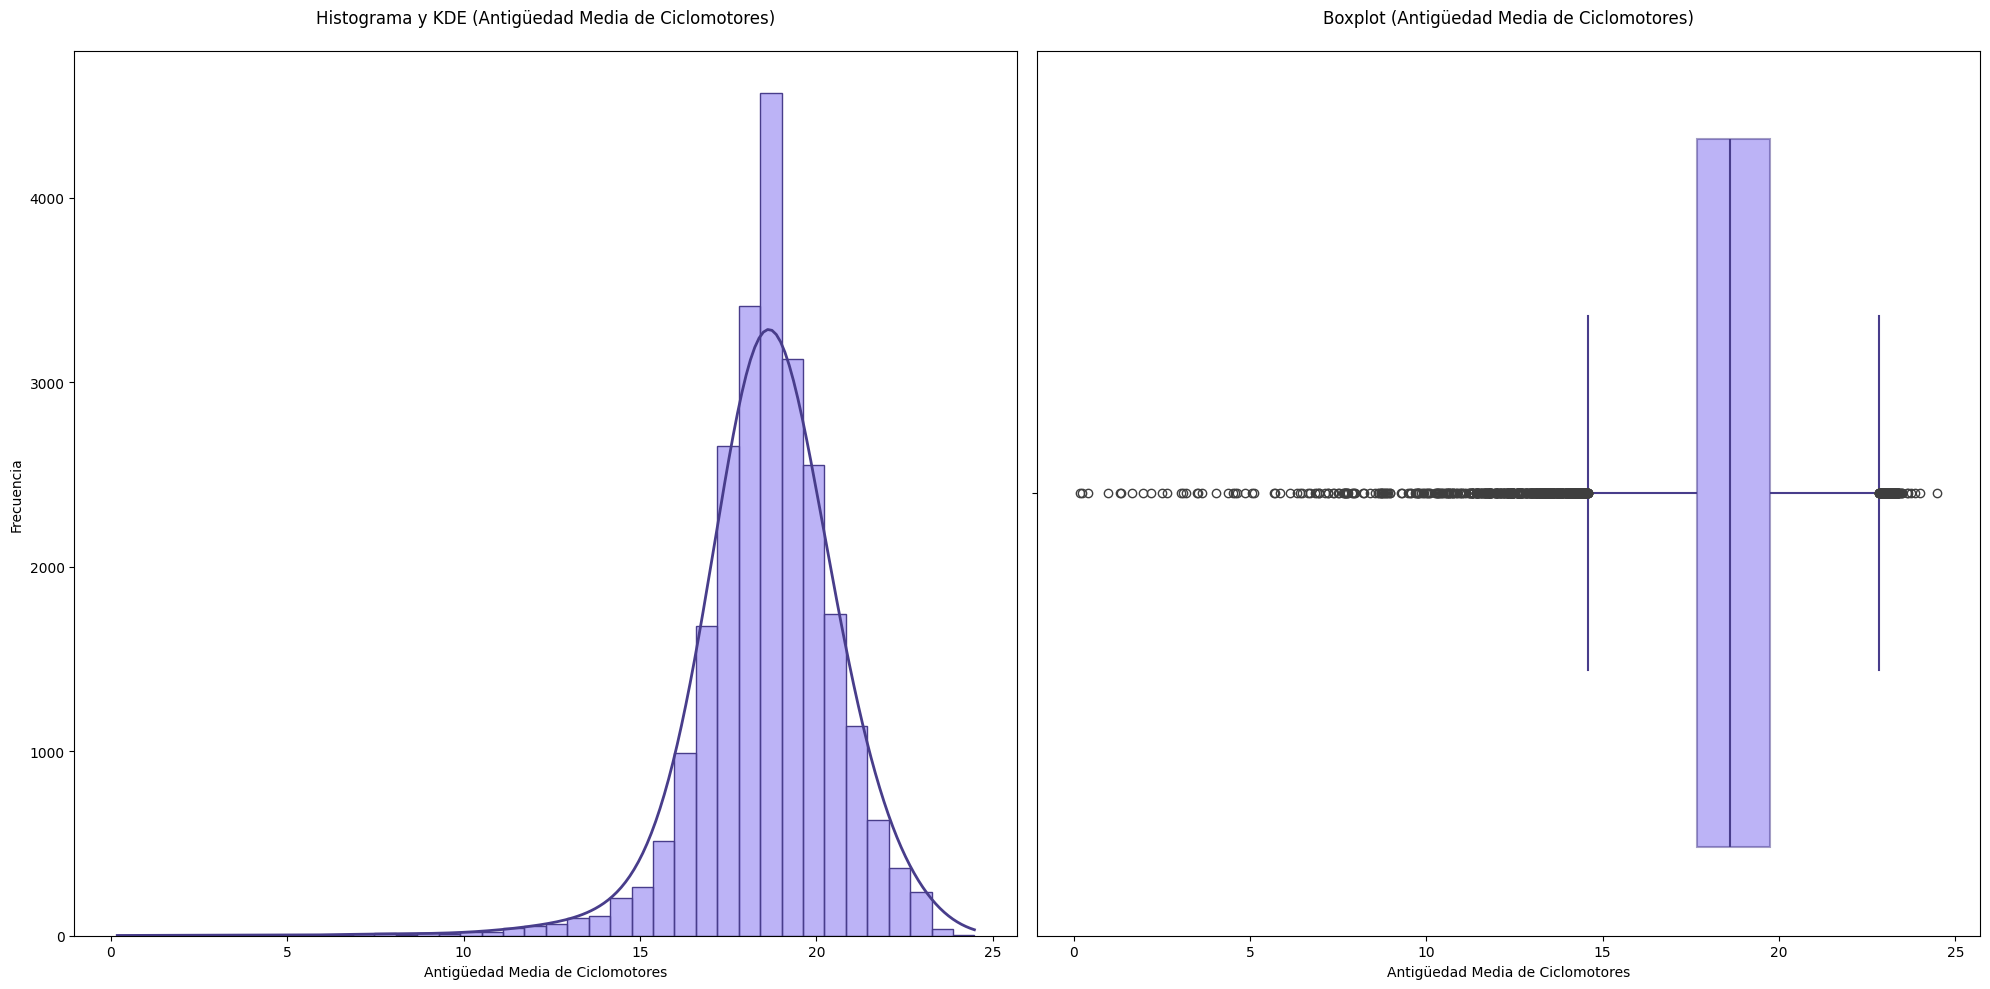

In [41]:
histo_box(dgt,"Antigüedad Media de Ciclomotores")

In [42]:
# Antigüedad Media de Motocicletas
dgt["Antigüedad Media de Motocicletas"].describe().round(2)

count    24588.00
mean        12.20
std          2.23
min          0.05
25%         10.97
50%         12.10
75%         13.26
max         24.94
Name: Antigüedad Media de Motocicletas, dtype: float64

In [43]:
outliers(dgt,"Antigüedad Media de Motocicletas")

Lim. Superior: 16.69, Lim. Inferior: 7.54.
Numero de datos por encima: 778, numero de datos por debajo: 472.
Numero de datos fuera de límites: 1250


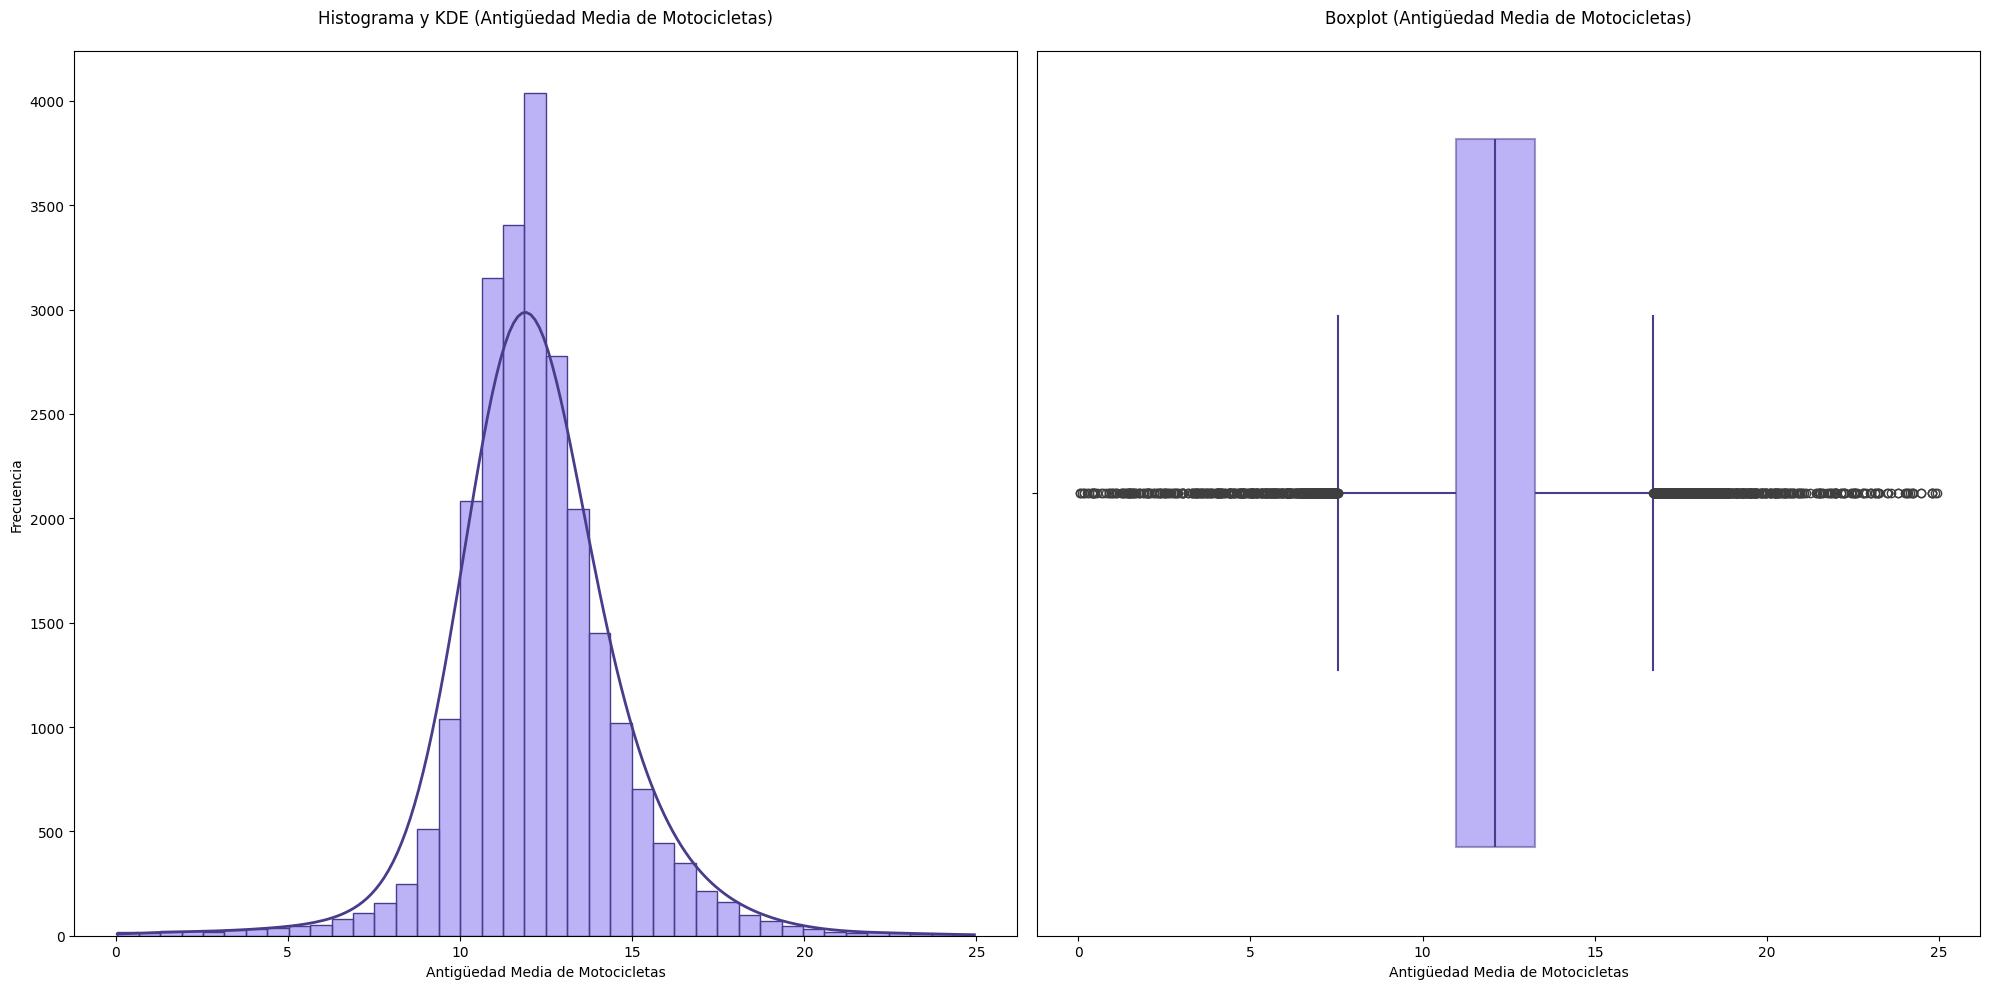

In [44]:
histo_box(dgt,"Antigüedad Media de Motocicletas")

In [45]:
# Antigüedad Media de Turismos
dgt["Antigüedad Media de Turismos"].describe().round(2)

count    24588.00
mean        13.10
std          1.53
min          1.66
25%         12.15
50%         13.16
75%         14.07
max         24.59
Name: Antigüedad Media de Turismos, dtype: float64

In [46]:
outliers(dgt,"Antigüedad Media de Turismos")

Lim. Superior: 16.96, Lim. Inferior: 9.27.
Numero de datos por encima: 135, numero de datos por debajo: 182.
Numero de datos fuera de límites: 317


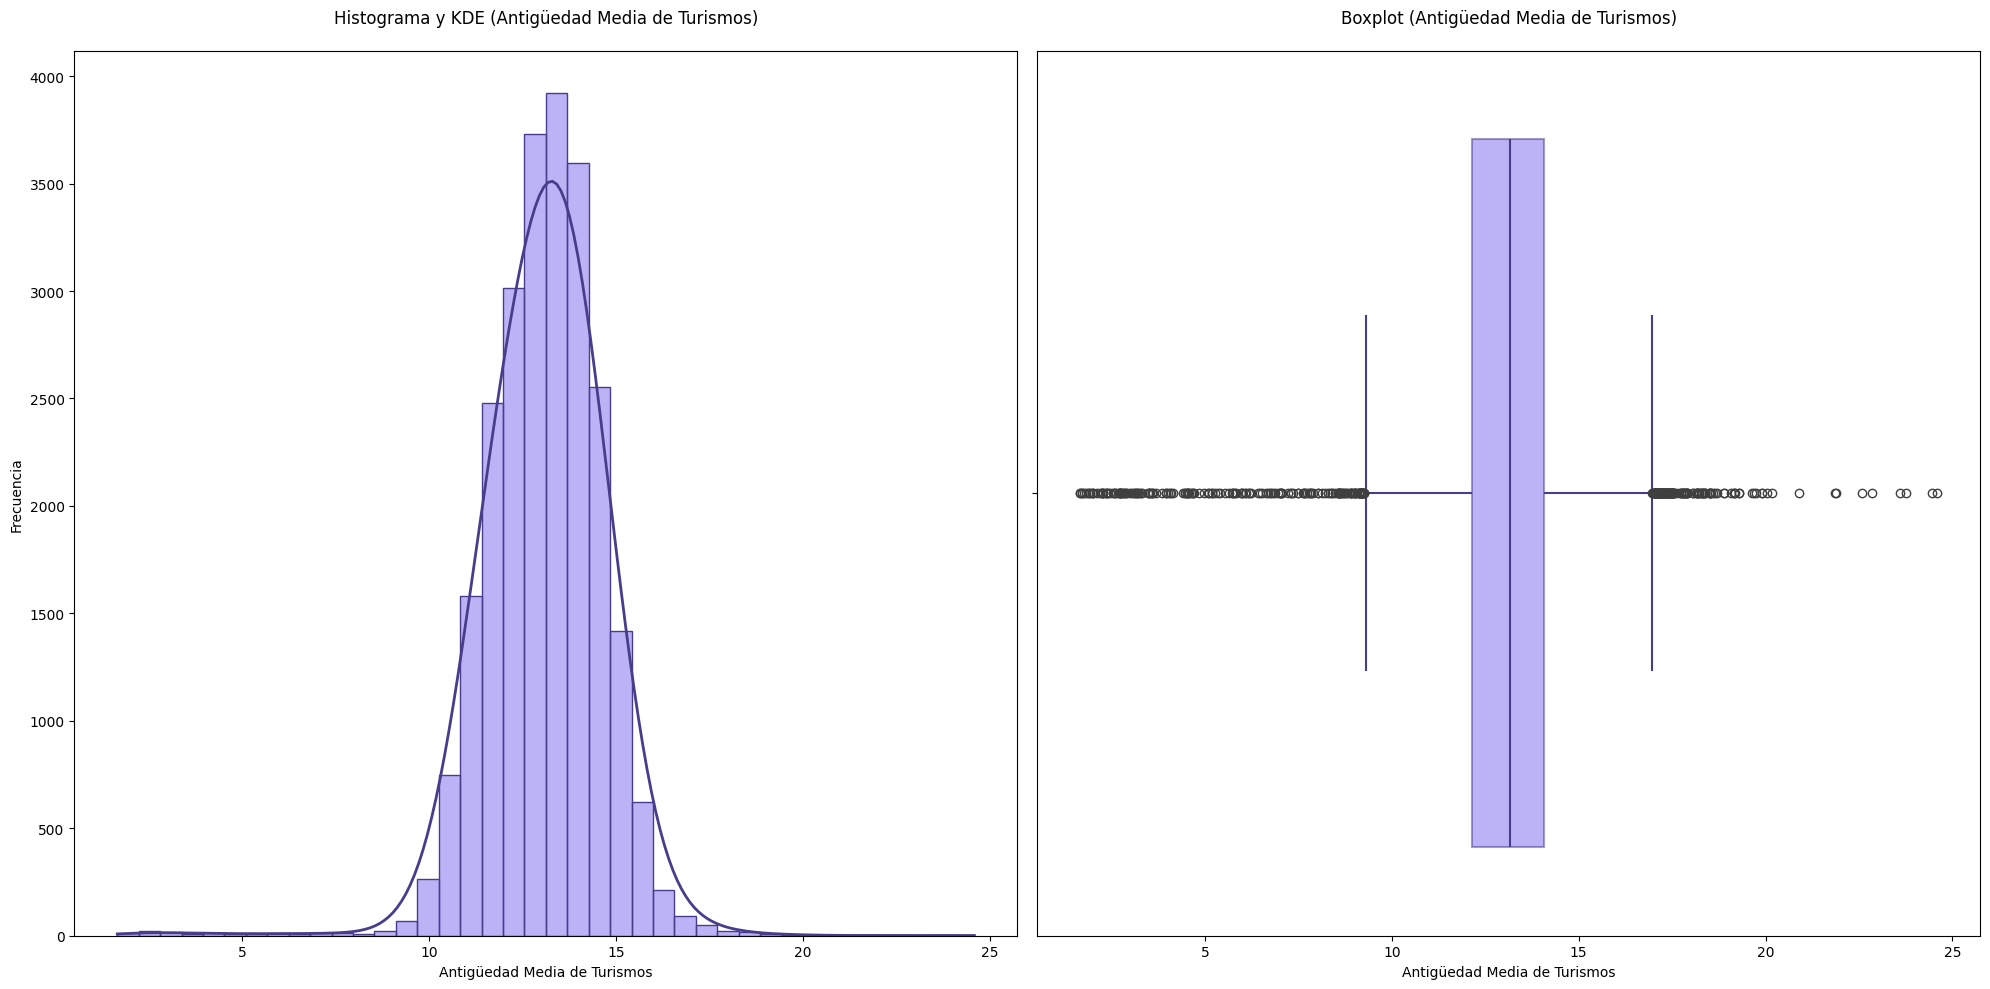

In [47]:
histo_box(dgt,"Antigüedad Media de Turismos")

In [48]:
# Antigüedad Media de Furgonetas
dgt["Antigüedad Media de Furgonetas"].describe().round(2)

count    24588.00
mean        14.82
std          2.83
min          0.54
25%         13.00
50%         14.84
75%         16.70
max         24.98
Name: Antigüedad Media de Furgonetas, dtype: float64

In [49]:
outliers(dgt,"Antigüedad Media de Furgonetas")

Lim. Superior: 22.26, Lim. Inferior: 7.44.
Numero de datos por encima: 168, numero de datos por debajo: 242.
Numero de datos fuera de límites: 410


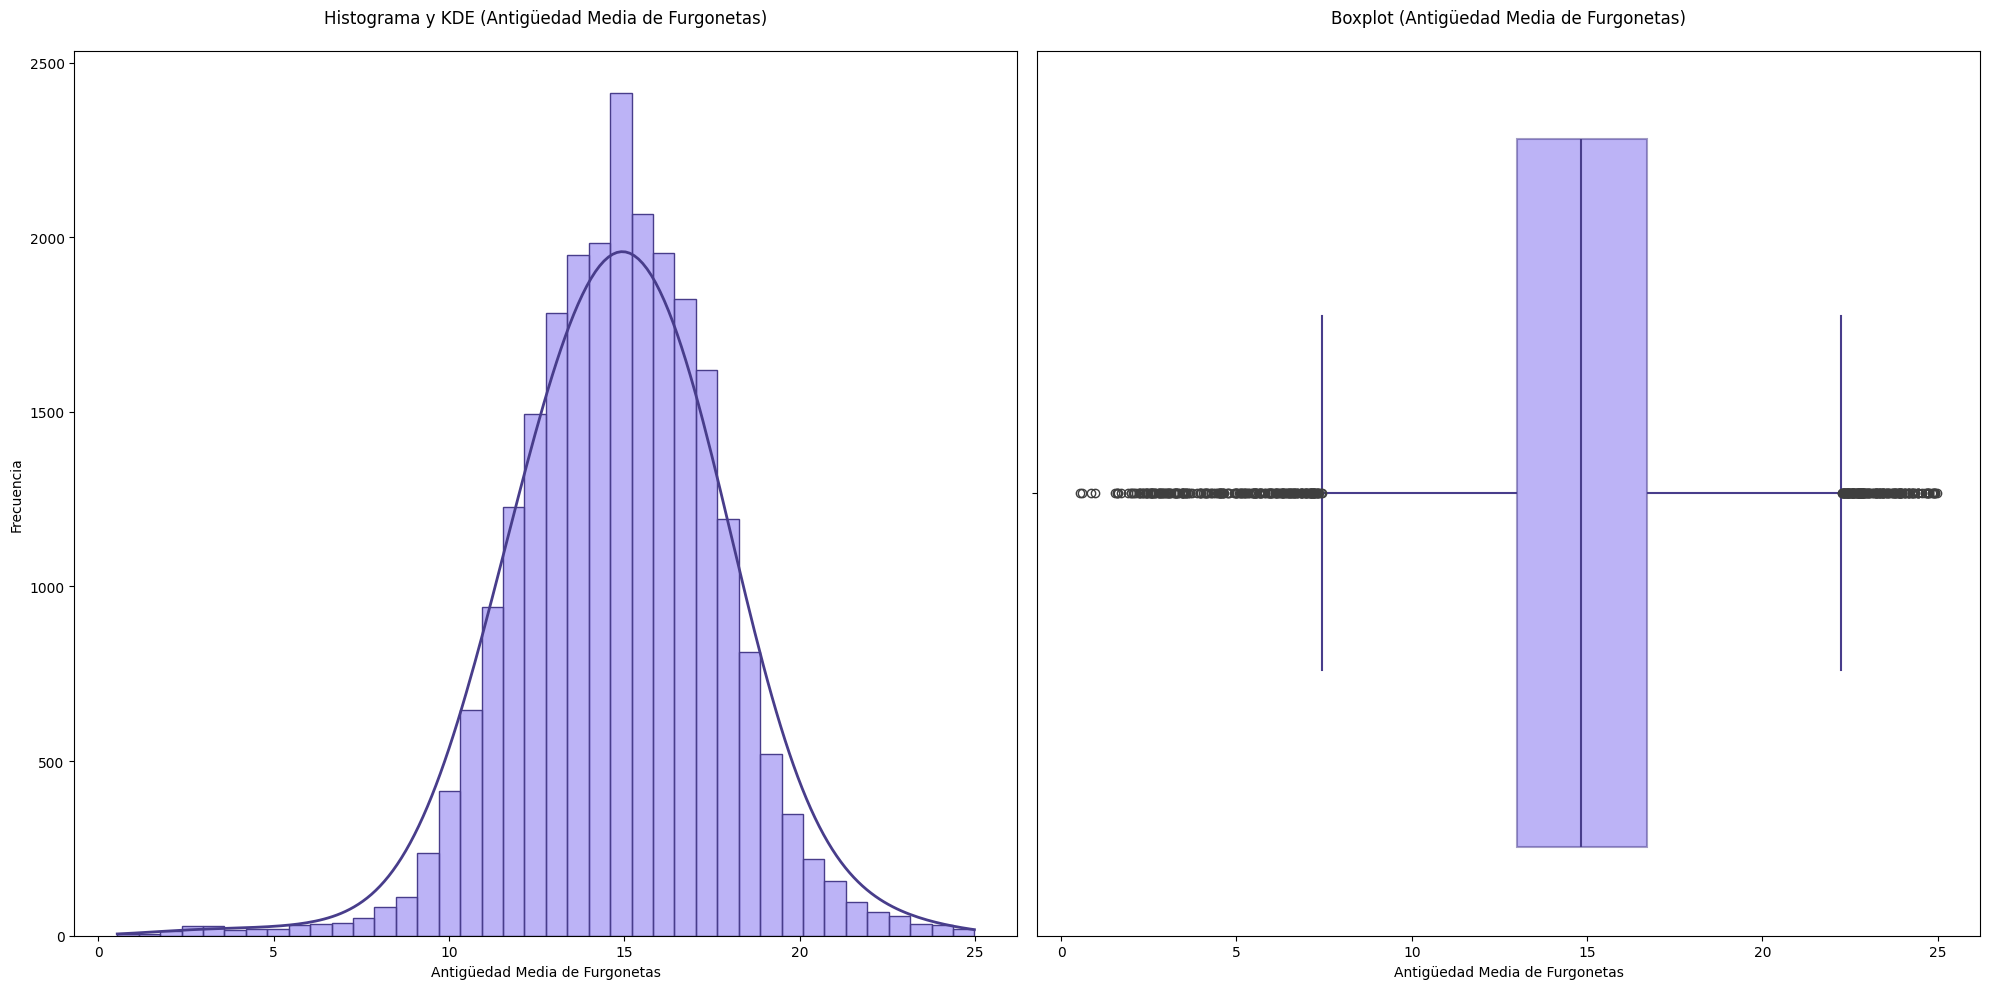

In [50]:
histo_box(dgt,"Antigüedad Media de Furgonetas")

In [51]:
# Antigüedad Media de Camiones
dgt["Antigüedad Media de Camiones"].describe().round(2)

count    24588.00
mean        15.39
std          2.10
min          0.54
25%         14.35
50%         15.39
75%         16.47
max         24.71
Name: Antigüedad Media de Camiones, dtype: float64

In [52]:
outliers(dgt,"Antigüedad Media de Camiones")

Lim. Superior: 19.64, Lim. Inferior: 11.18.
Numero de datos por encima: 600, numero de datos por debajo: 605.
Numero de datos fuera de límites: 1205


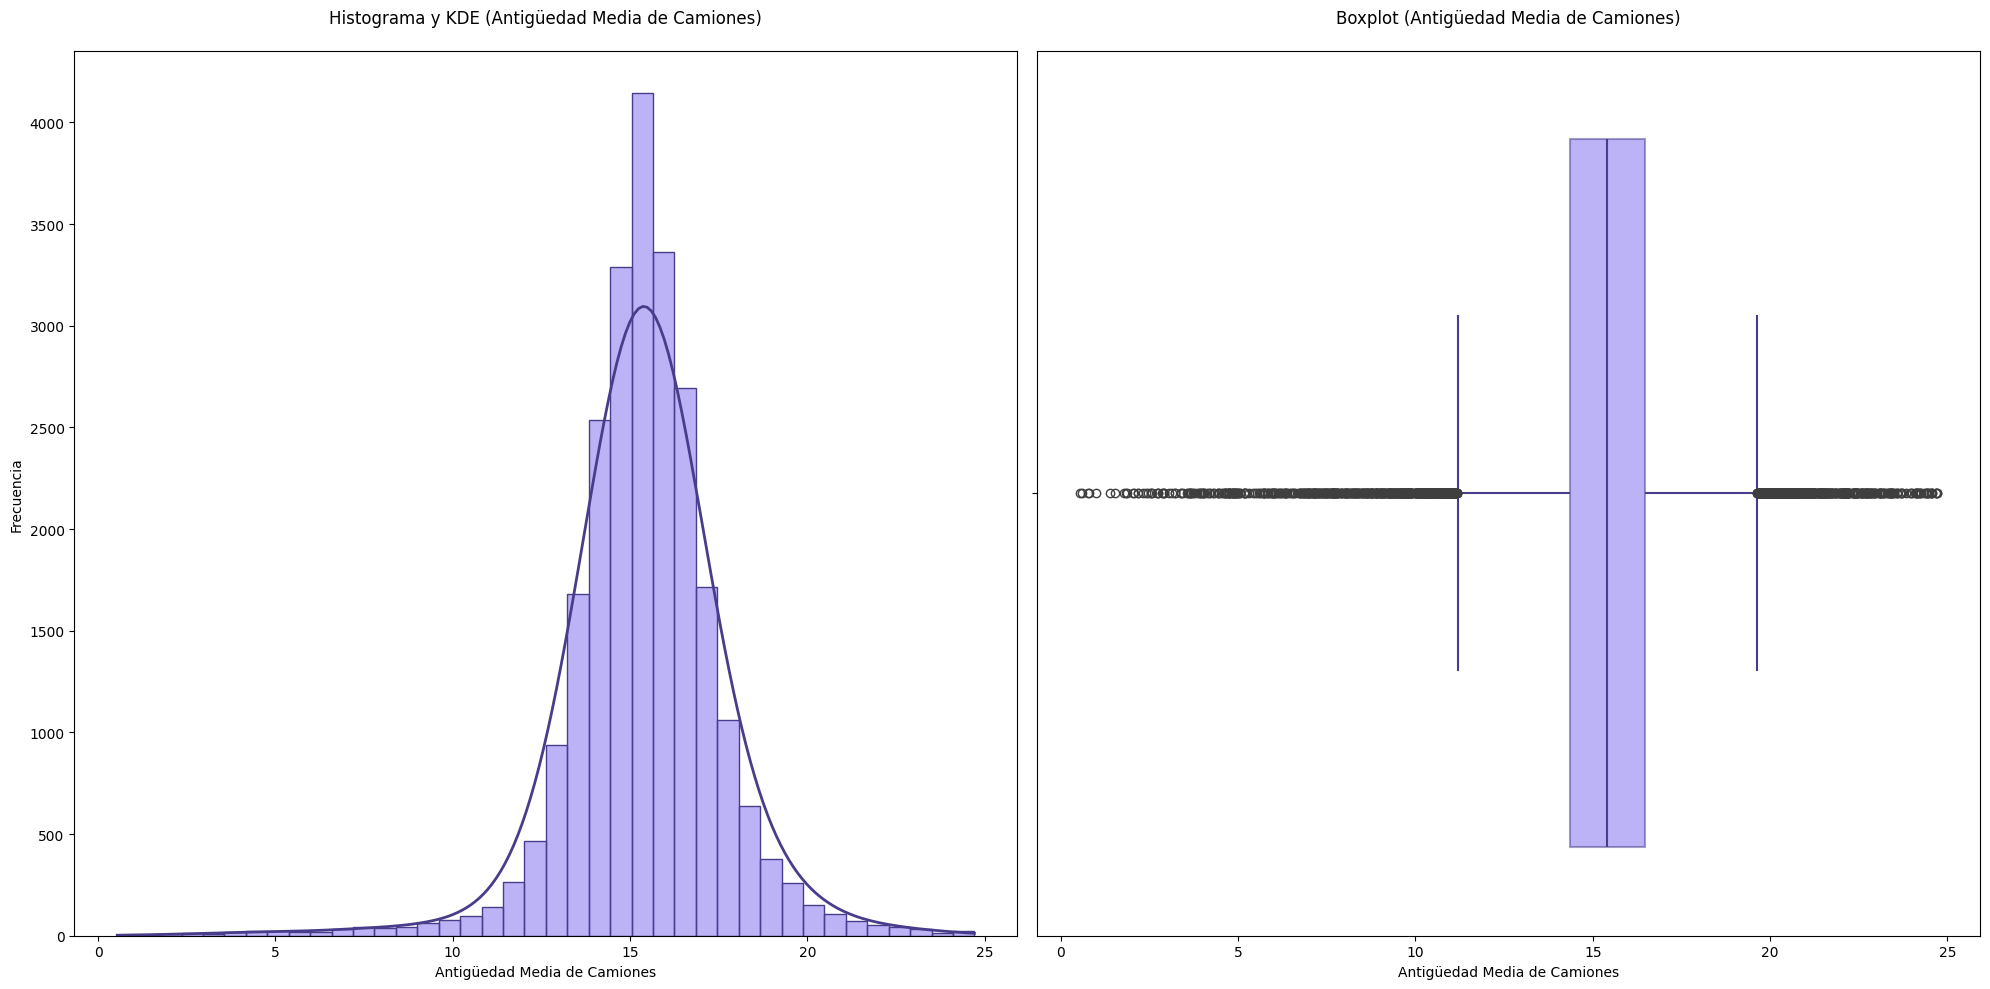

In [53]:
histo_box(dgt,"Antigüedad Media de Camiones")

RESUMEN NUMERICAS CONTINUAS

**Antigüedad Media del Parque (<25 años)**: El conjunto de vehículos tiene una media de 13.79 años. Los datos presentan una baja desviación y una distribución muy centrada.
Podemos apreciar que hay outliers que representan a los municipios que están por debajo de 10 años (264) y por encima de 17.6 (105).

**Antigüedad Media de Ciclomotores**: La antigüedad media de los ciclomotores es de 18.61 años. El conjunto de datos presenta una agrupación centrada en torno al valor medio. En este caso sus outliers por debajo del limite de 14.6 años son muchos, esto se ve en el gráfico de caja en la larga cola que deja.

**Antigüedad Media de Motocicletas**: Las motocicletas presentan una antigüedad menor que los ciclomotores, de 12.2 años de media. Tambien se observan datos muy centrados y con una ligera predominancia en el número de datos, antes de la mediana. por la forma desigual del histograma.

**Antigüedad Media de Turismos**: En general la antigüedad de los turismos, es de 13.1 años, siendo muy pequeña la desviacion de edad y con menor distancia entre el Q2-Q1 que entre Q3-Q2.

**Antigüedad Media de Furgonetas** Para las furgonetas la edad media es de 14.8 años y aquí hay una ligera asimetría con mayor distribución en el lado derecho. Su forma tanto en el histograma como en el gráfico de caja, es más ancho, lo que implica mayor desviación de los datos. El pico producido en el centro, se debe a que presentaba muchos valores sin rellenar, que se cubrieron con la media.

**Antigüedad Media de Camiones** La antigüedad media de los camiones es de 15.4. Los datos presentan una poblacion distribuida uniformemente con simetría y poca desviación en general.

Se puede completar el análisis con el repunte que hay en el pico de cada histograma, debido a la gran falta de valores por tratarse de datos faltantes. Esto, explica porqué es tan pronunciado.

Además, suponiendo que, cuanto más nuevo, más seguro es el vehículo (aparentemente). ¿Cómo afecta el número de fallecidos en funcion de la antigüedad? Pregunta que intentaré responder más adelante.

#### NUMÉRICAS DISCRETAS

En esta sección analizaré las columnas de Población Total y Fallecidos ya que el resto de columnas que contienen Fallecidos y Población son sumandos. También haré un repaso general de heridos leves, graves y fallecidos por cada turismo para tener una visión global.

In [54]:
# Fallecidos
dgt["Fallecidos"].value_counts()

Fallecidos
0     23916
1       471
2       108
3        34
4        23
5         8
6         7
7         3
8         3
11        2
9         2
12        2
22        1
28        1
16        1
13        1
24        1
36        1
20        1
44        1
10        1
Name: count, dtype: int64

In [55]:
dgt["Fallecidos"].describe()

count    24588.000000
mean         0.052261
std          0.604811
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         44.000000
Name: Fallecidos, dtype: float64

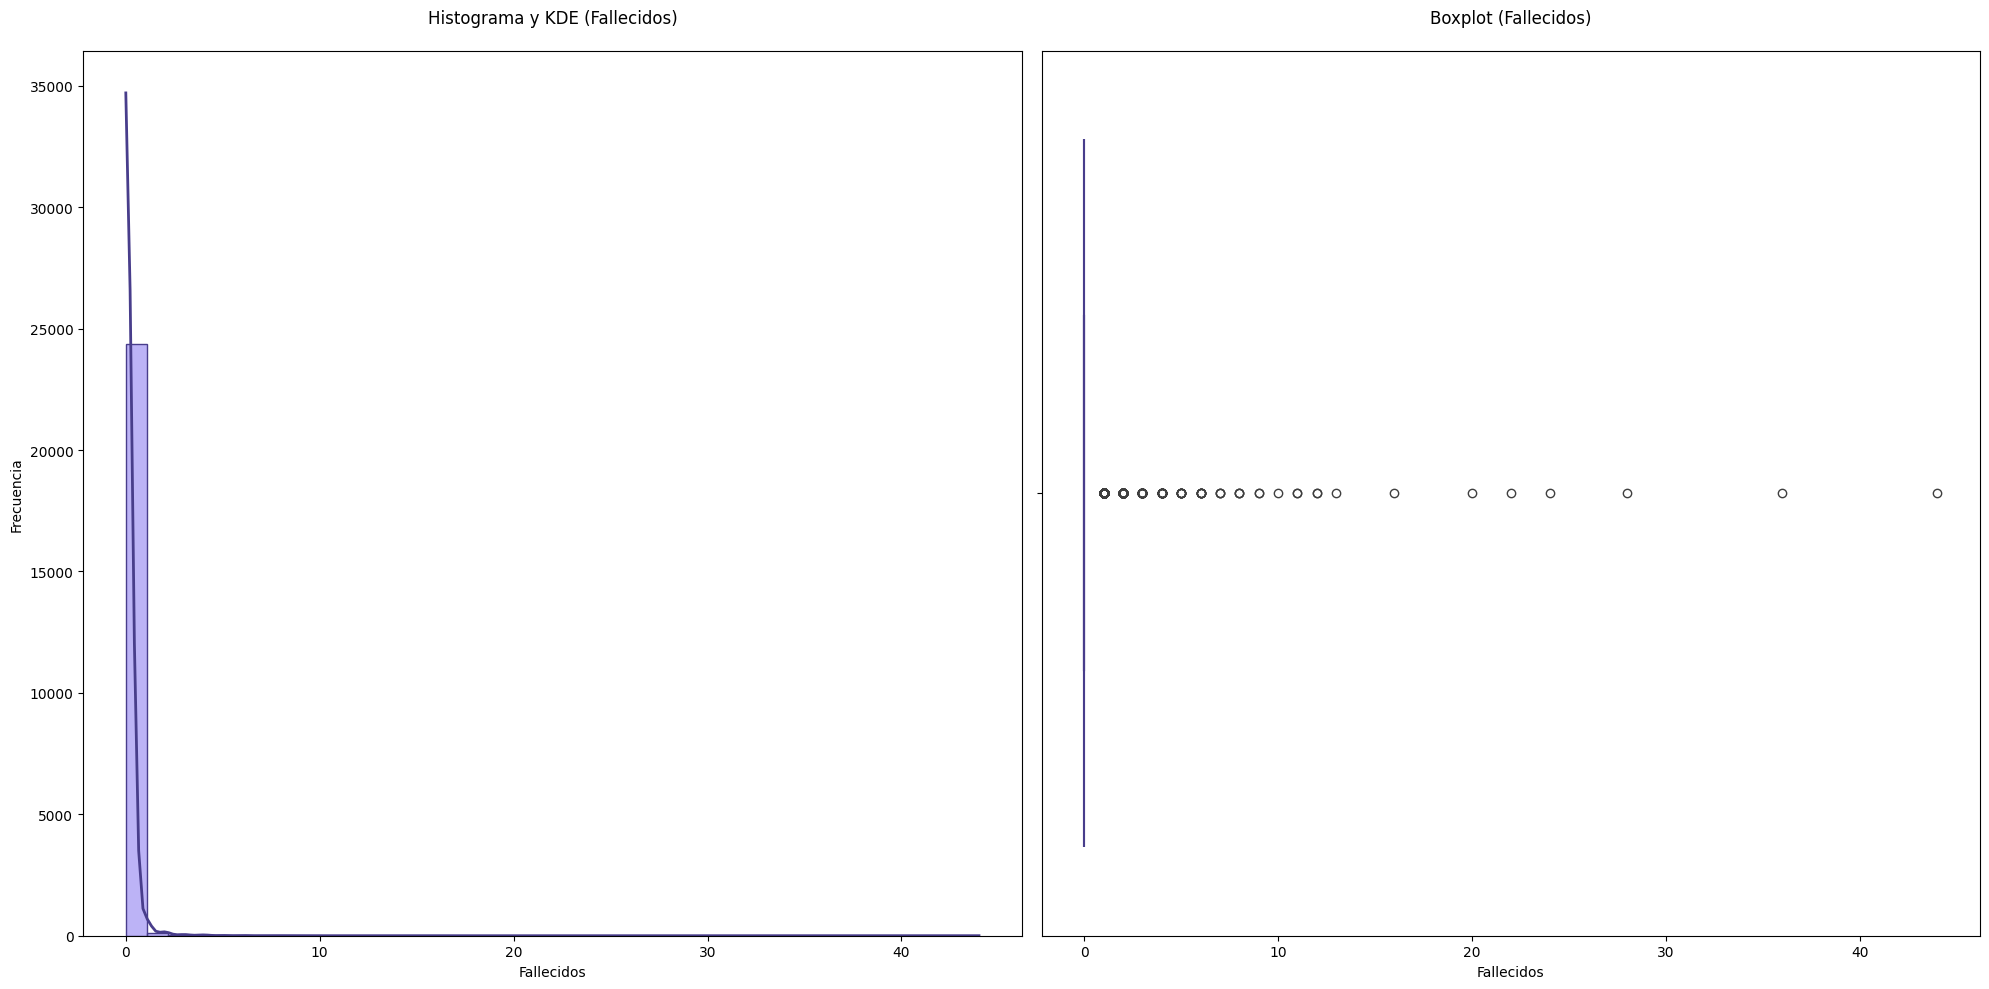

In [56]:
histo_box(dgt,"Fallecidos")

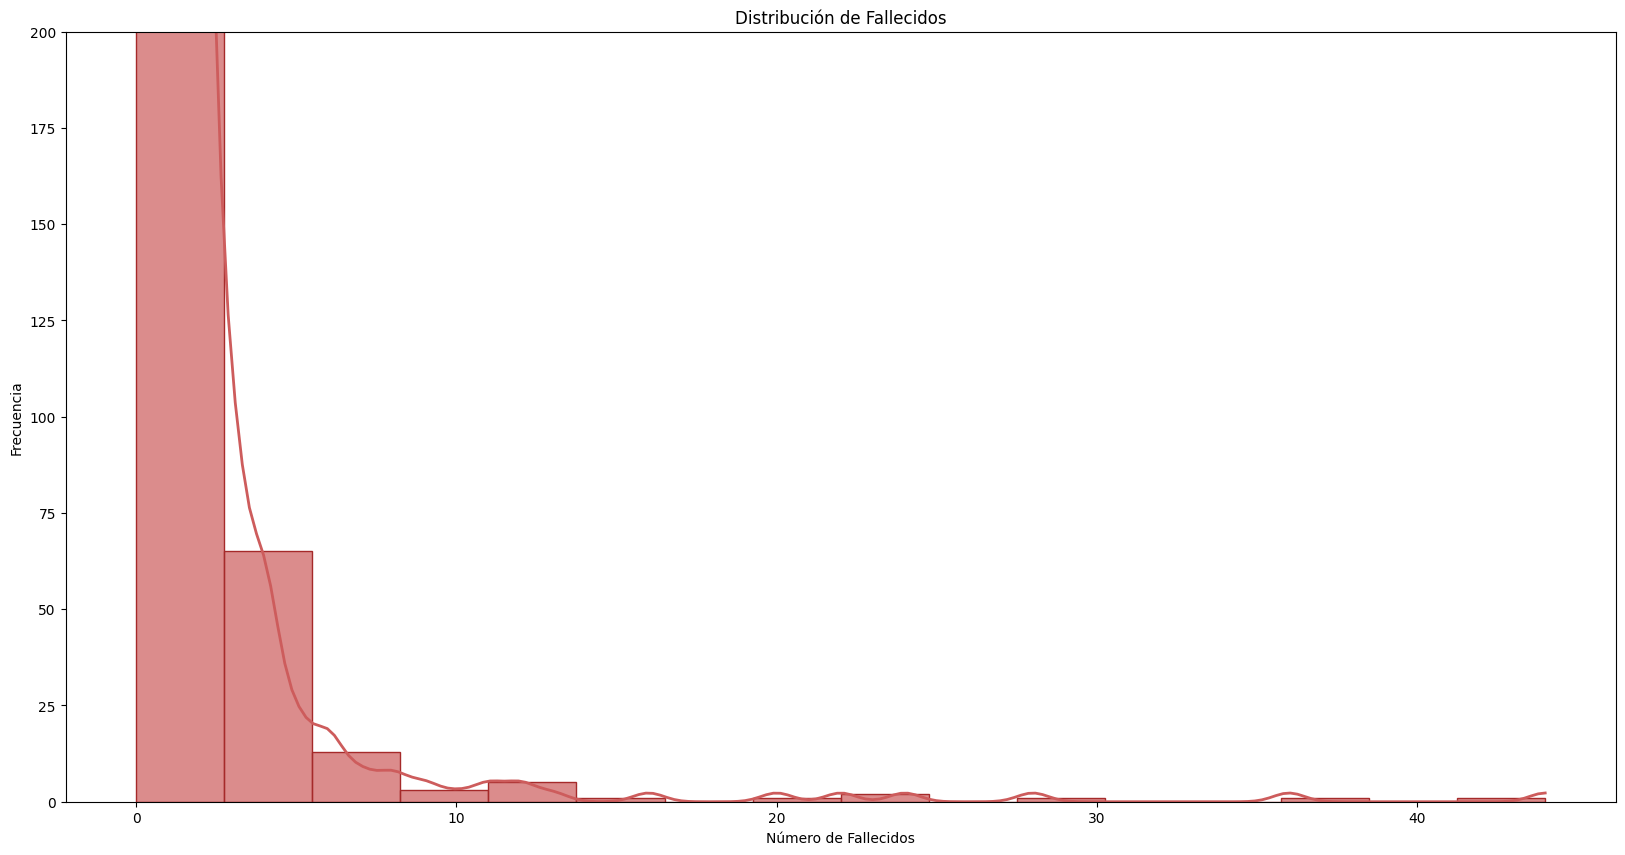

In [57]:
# Hay muy pocos valores distintos de 0, 
# hacemos una nueva grafica para verla en detalle
fallecidos(dgt,kde=True)

In [58]:
# Poblacion Total
dgt["Población Total"].describe()

count    2.458800e+04
mean     5.787836e+03
std      4.773657e+04
min      0.000000e+00
25%      1.480000e+02
50%      5.130000e+02
75%      2.383000e+03
max      3.334730e+06
Name: Población Total, dtype: float64

In [59]:
dgt["Población Total"].sum()

142311322

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


In [61]:
def histo_box(df, col_num, k=1.5, bin=40, ajuste_y=None):
    """
    Visualiza un histograma con KDE y un boxplot para una columna numérica en un DataFrame.

    Parametros:
    - df: DataFrame, el conjunto de datos.
    - col_num: str, el nombre de la columna numérica.
    - k: float, el factor para calcular los límites del bigote (default: 1.5).
    - bin: int, el número de bins en el histograma (default: 40).
    - ajuste_y: int, el número máximo de valores en el eje y del histograma (default: None).
    """
    # Asegurar que max_y_values sea un valor numérico entero
    if ajuste_y is not None and not isinstance(ajuste_y, int):
        raise ValueError("max_y_values debe ser un valor numérico entero.")
    
    # Crear la figura y los ejes
    fig, (ax_hist, ax_box) = plt.subplots(1, 2, figsize=(20, 10), gridspec_kw={'width_ratios': [1, 1]})

    # Graficar histograma y KDE en el primer eje
    sns.histplot(df[col_num], bins=bin, kde=True, ax=ax_hist, color="mediumslateblue", edgecolor="darkslateblue", alpha=0.5,
                  line_kws = {'linewidth':'2'},kde_kws={'bw_method': 0.5}).lines[0].set_color("darkslateblue")
    ax_hist.set_xlabel(col_num)
    ax_hist.set_title(f'Histograma y KDE ({col_num})',pad=20)
    ax_hist.set_ylabel('Frecuencia')

    # Limitar el número máximo de valores en el eje y del histograma si se especifica
    if ajuste_y is not None:
        ax_hist.set_ylim(0, ajuste_y)

    # Graficar boxplot en el segundo eje
    whisker_props={"color":"darkslateblue",
                   "linewidth": 1.5}
    box_props={"edgecolor":"darkslateblue",
               "linewidth": 1.5,
               "facecolor": "mediumslateblue", "alpha":0.5}
    median_props={"color":"darkslateblue",
                  "linewidth": 1.5}
    cap_props={"color": "darkslateblue",
               "linewidth": 1.5}
    sns.boxplot(x=df[col_num], ax=ax_box, whis=k, whiskerprops=whisker_props, boxprops=box_props, medianprops=median_props, capprops=cap_props)
    ax_box.set_title(f'Boxplot ({col_num})',pad=20)
    ax_box.set_xlabel(col_num)

    # Ajustar el diseño para que no haya superposiciones
    plt.tight_layout()

    # Mostrar el gráfico
    plt.show()

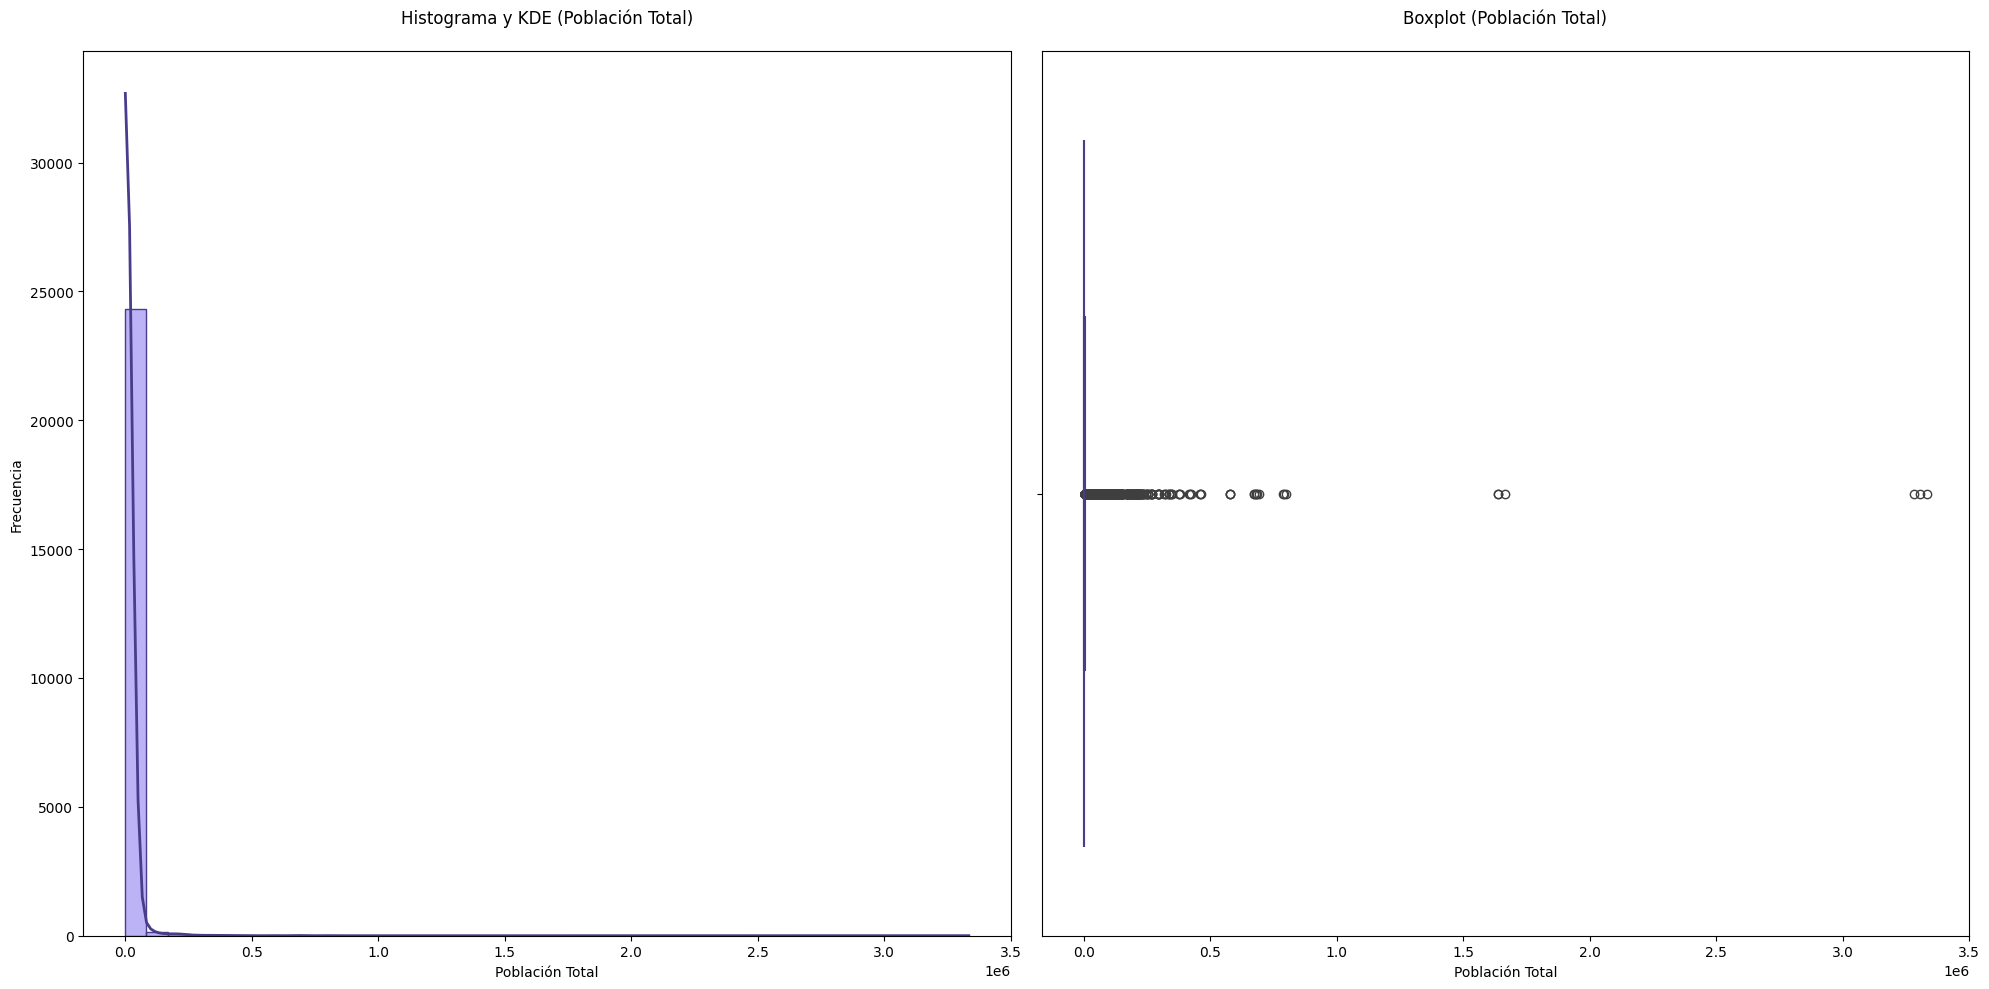

In [62]:
histo_box(dgt,"Población Total")

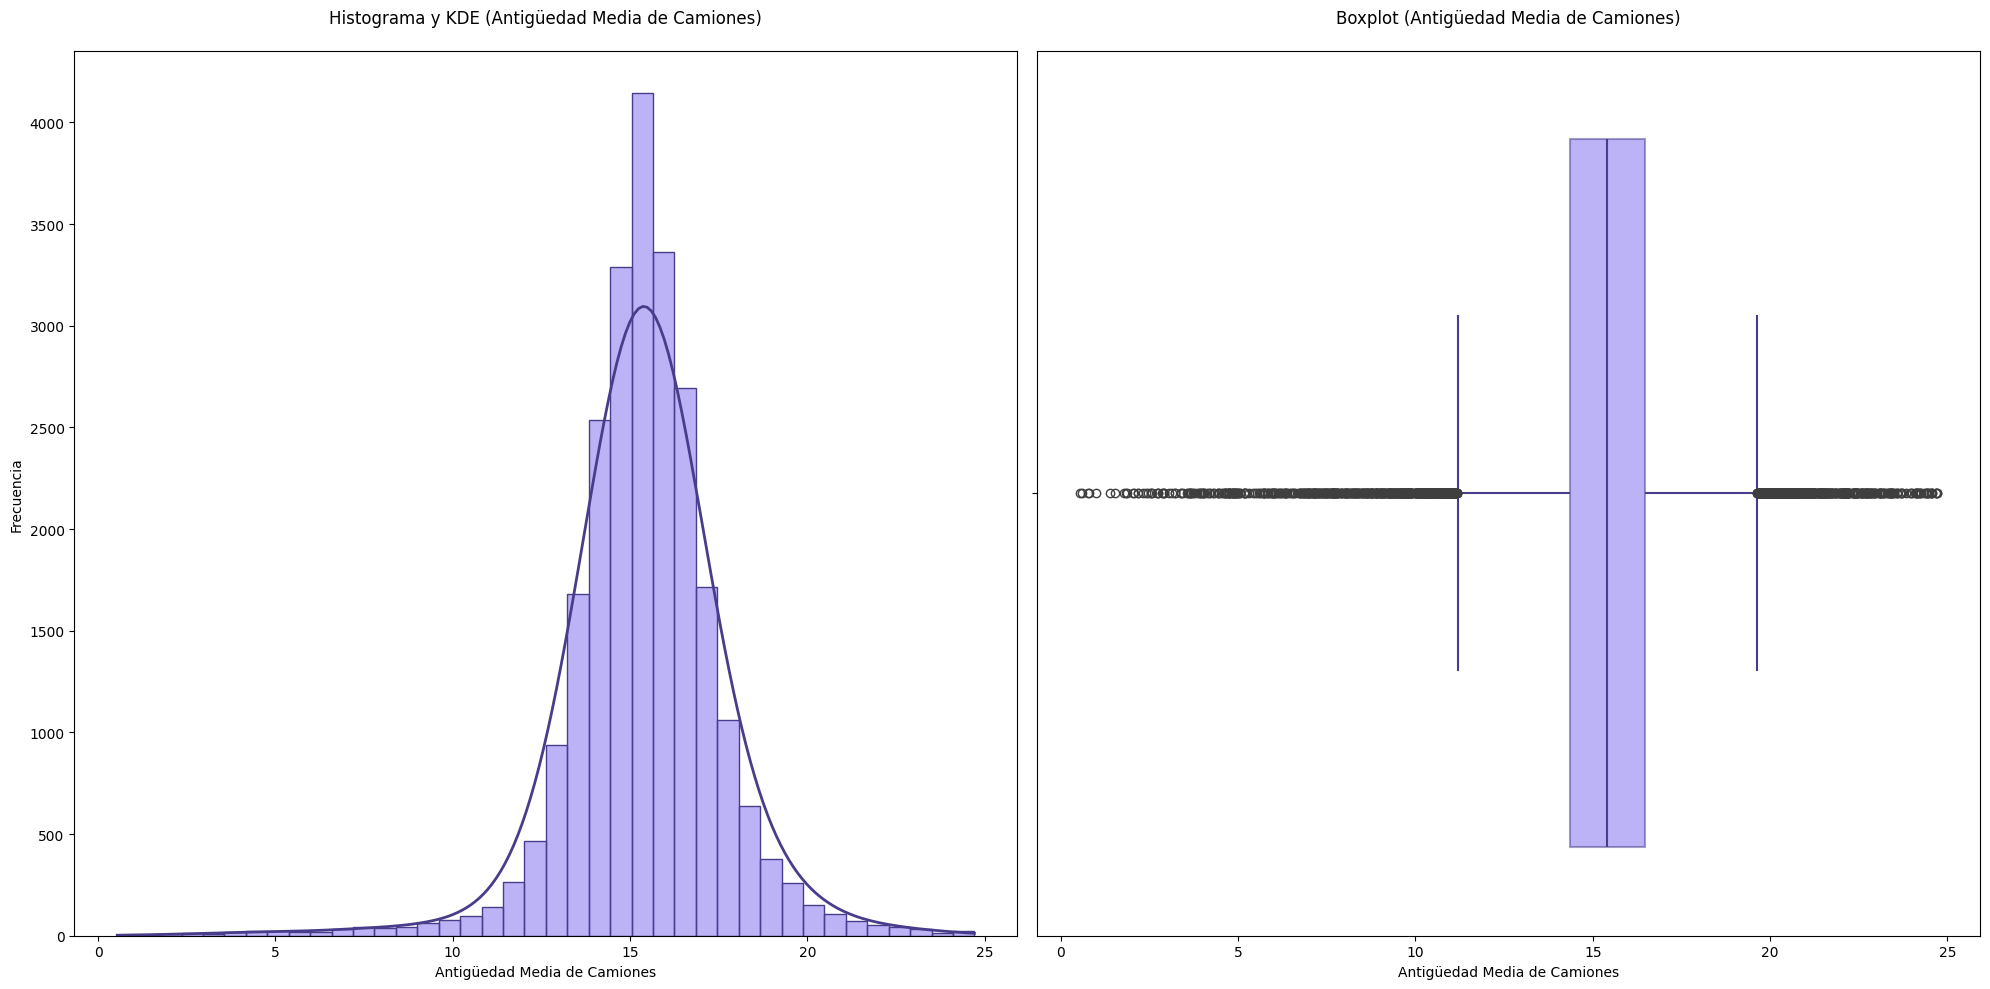

In [63]:
histo_box(dgt,"Antigüedad Media de Camiones")

In [64]:
dgt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24588 entries, 0 to 24587
Data columns (total 77 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Código INE                              24588 non-null  object 
 1   Municipio                               24588 non-null  object 
 2   Provincia                               24588 non-null  object 
 3   Comunidad Autónoma                      24588 non-null  object 
 4   Población Total                         24588 non-null  int64  
 5   Población Hombres                       24588 non-null  int64  
 6   Población Mujeres                       24588 non-null  int64  
 7   Conductores Hombres                     24588 non-null  int64  
 8   Conductoras Mujeres                     24588 non-null  int64  
 9   Censo Conductores                       24588 non-null  int64  
 10  Parque Ciclomotores                     24588 non-null  in

RESUMEN NUMERICAS DISCRETAS

**Fallecidos**: Por suerte, los datos presentan muy pocos valores distintos de 0. La media está en 0.0522 Esto supone, que en el histograma no se aprecie más que un bloque al inicio, disparando la curva kde. En el gráfico de cajas todos los valores distintos de 0 representan outliers. Si hacemos una gráfica más cercana vemos que existen (pocos) valores distintos de 0.

**Población Total**: Los datos representan al conjunto de hombres y mujeres de cada municipio. Con una media de 5787 habitantes por municipio.

In [65]:
columnas_fallecidos = dgt.filter(like='Fallecidos').columns.tolist()
print(columnas_fallecidos)

['Bicicletas Fallecidos', 'Ciclomotores Fallecidos', 'Motocicletas Fallecidos', 'Turismos Fallecidos', 'Furgonetas Fallecidos', 'Camiones Fallecidos', 'Autobús Fallecidos', 'Otros Fallecidos', 'Peatones Fallecidos', 'Fallecidos']


In [66]:
dgt.Fallecidos.info()

<class 'pandas.core.series.Series'>
RangeIndex: 24588 entries, 0 to 24587
Series name: Fallecidos
Non-Null Count  Dtype
--------------  -----
24588 non-null  int64
dtypes: int64(1)
memory usage: 192.2 KB


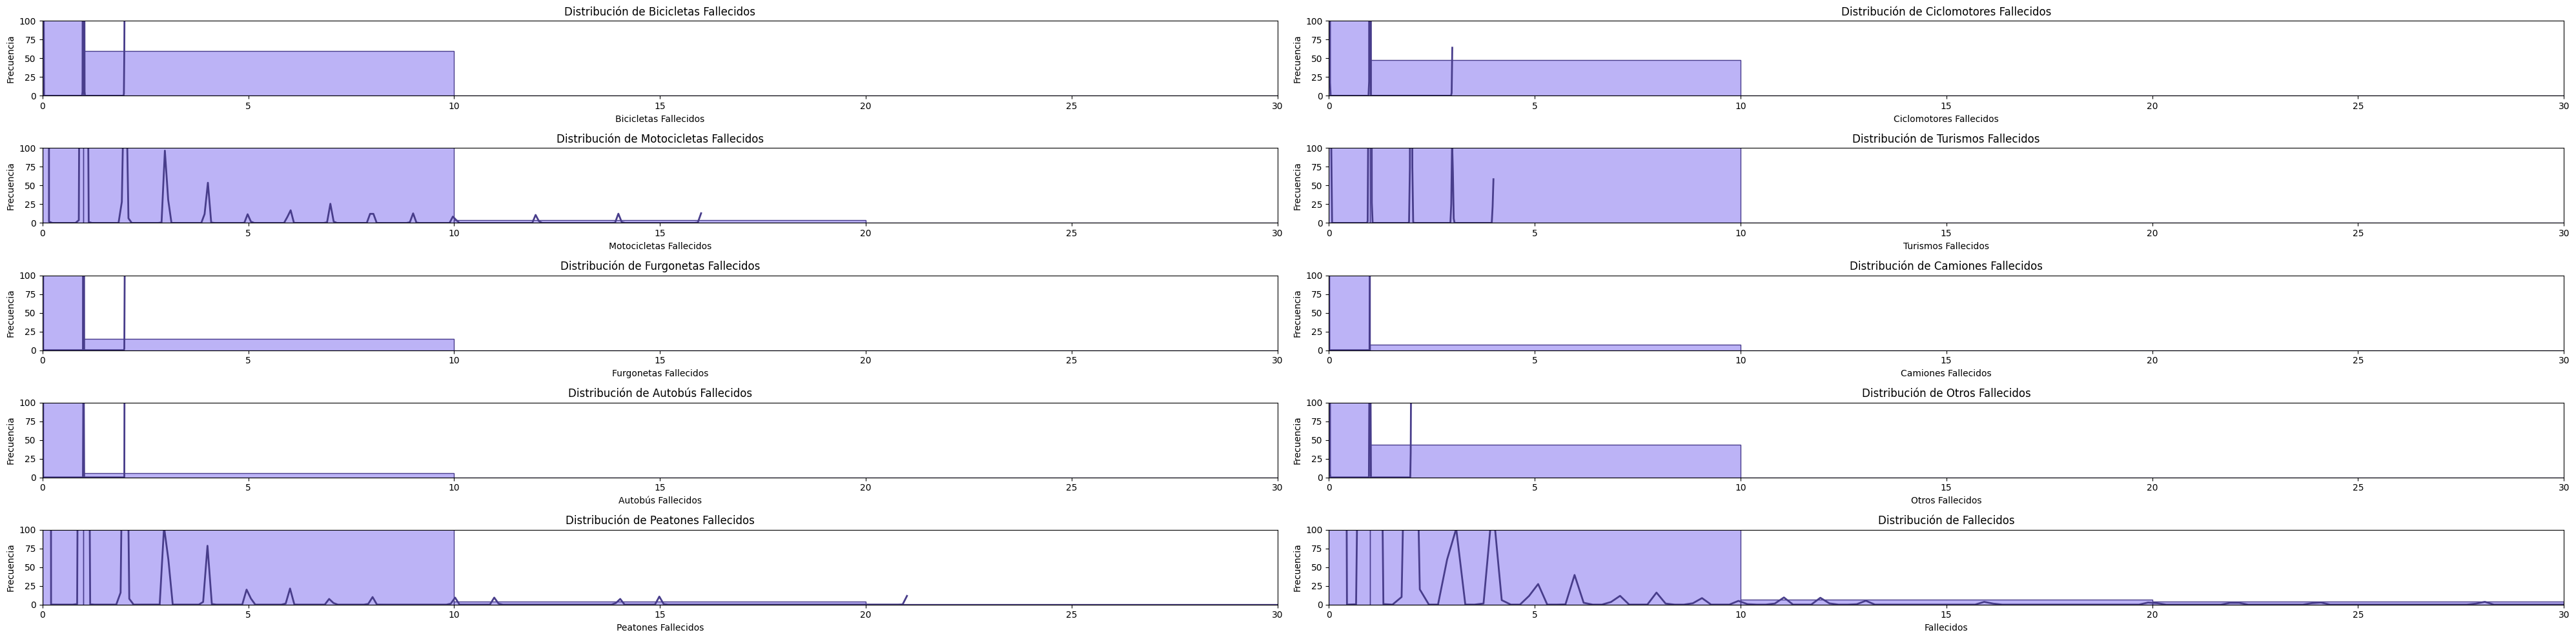

In [67]:
grupal_num_disc(dgt,columnas_fallecidos)

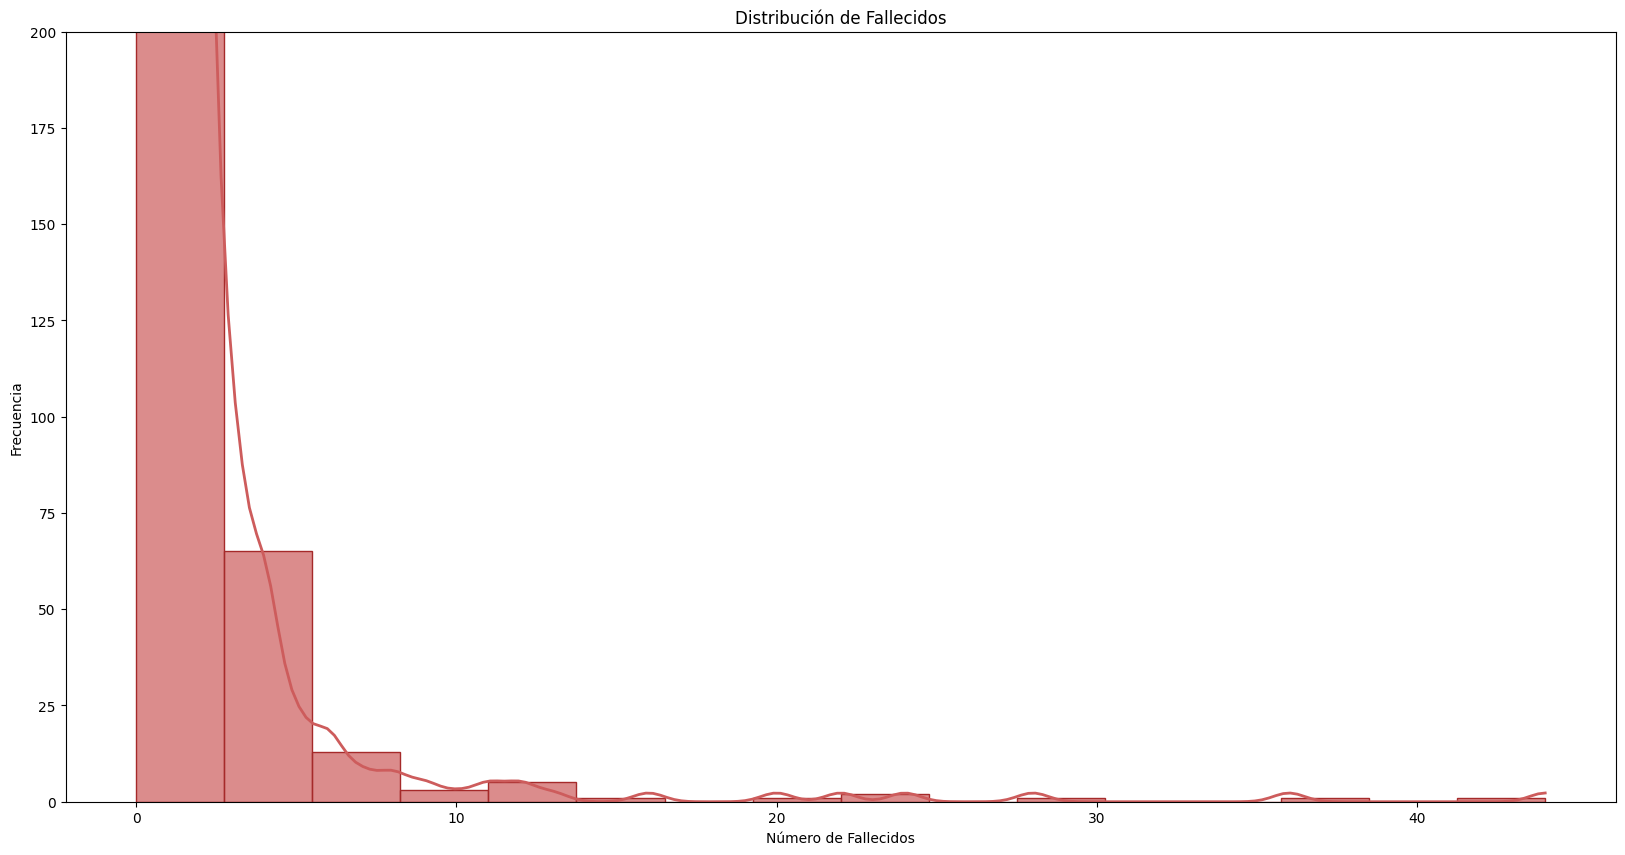

In [68]:
fallecidos(dgt,"Camiones")